# Algoritmos supervisionados para classificação

# 

# 1. Introdução ao problema

Este documento tem como objetivo avaliar um conjunto de resultados de exames médicos utilizados no diagnóstico do câncer de Mama. Para aplicar recursos computacionais para previsão do tipo de câncer utilizando os valores obtidos com cada exame.

Um dos grandes desafios é classificar um tumor como sendo maligno ou benigno. A motivação para realização deste trabalho é avaliar através de modelagem computacional e algoritmos de machine learning a determinação da forma do tumor.


# 2 Ambiente de Análise

Para realização dos tratamento dos dados será utilizado a distribuição Anaconda que disponibiliza integração com diversos 
toolboxes e aplicações python (Igual , et al., 2017). Esses quites são importantes para dar mais praticidade ao desenvolvimento. 
A ferramenta JupyterLab dentro da distribuição Anaconda será utilizada para desenvolvimento dos códigos e plotagem de gráficos e 
tabelas que serão apresentadas durante as analises 

# 3. Base de Dados

Para esse tarefa foram coletados um conjunto de dados disponibilizados no site Kaggle com a descrição abaixo:
URL: https://www.kaggle.com/yasserh/breast-cancer-dataset
“Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset”. (M Yasser H, 2021)
O site também qualifica a usabilidade do dataset como 10, alto nível de aplicação pratica.

	A base de dados contém 569 resultados de exames de 32 exames com seus respectivos diagnósticos, informando se o tumor é do tipo B – Benigno ou do tipo M - Maligno



# 4. Import de Dados

Import dos dados CSV utilizando a biblioteca Pandas e visualização do cabeçalho

In [380]:
import pandas as pd
dataSet = pd.read_csv("C:\\Users\\Erik\\Documents\\Jupiter\\POS\\archive_cancer_Detection\\breast-cancer.csv")
dataSet.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remoção da coluna ID porque não é necessário para a modelagem porque está somente como um código identificador da linha.

In [381]:
dataSet2 =dataSet.drop(columns=["id"])
dataSet2.head()
target = dataSet ['diagnosis'].values


In [382]:
change ={'B' : 0, 'M': 1}
DataBin = pd.DataFrame(dataSet ['diagnosis'].map(change))

Todas as variáveis de entrada são do tipo Float64, dessa forma, a priori, não há necessidade de conversão de tipos. A variável alvo é do tipo object. A formatação é do tipo decimal para todas as colunas contendo os exames, ou seja, não a data ou formatos numéricos que possam causar alguma distorção de interpretação por conta do formato ao modelo.
Valores Continuos Float64

Váriável alvo é tipo Objecto, categórica, "M" - Cancer Maligno e "B" - Cancer Benigno

In [383]:
dataSet2.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# Balanceamento dos dados

O gráfico abaixo está mostrando as quantidades percentuais de cada tipo de câncer dentro do dataset. Ou seja, as ocorrências de resultados benignos e maligonos dos tumores dos exames do dataset. A quantidade B corresponde a 62,74% e a quantidade M a 37,26%. Caso houvesse desbalanceamento, seria necessário, pensar em coletar mais dados. Ou caso não fosse possíve, aplicar algum metodode ajuste. Undersampling, Esse método consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias. O Oversampling consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categoria. Tambem a validação cruzada e pode ajudar, dependendo de como esta o desbalanceamento.

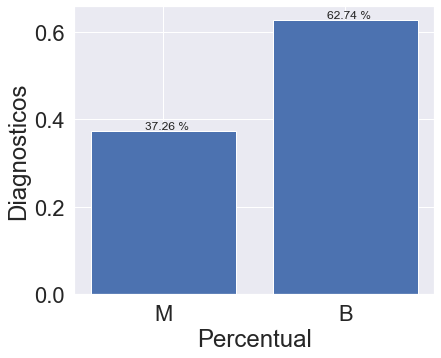

In [384]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize =(5,4))
ax = fig.add_axes([0,0,1,1])
types= ['M', 'B']
percent=[pd.DataFrame(target).value_counts(normalize=True)['M'],pd.DataFrame(target).value_counts(normalize=True)['B']]
ax.bar(types,percent)
ax.set_ylabel('Diagnosticos')
ax.set_xlabel('Percentual')
for index, value in enumerate(percent):
        txt= f'{round(value*100, 2)} %'
        y_coord = value + 0.005
        x_coord=index - 0.1
        ax.text(x=x_coord,y=y_coord, s=txt, fontsize=12)
        ax.grid()
        
plt.show()

# 5. Etapas Modelo de Classificação

5.1 - Coleta de dados informações para sobre o tema. Por exemplo neste caso específico foi verificado no site Kaggle datasets
para classificação na área da saúde, e foi encontrado este dataset https://www.kaggle.com/yasserh/breast-cancer-dataset. Mas em 
um caso de não haver o dataset pronto, deveria ser procurado em base de dados de hospitais por exemplo, os exames utilizados no diagnostico para elaboração do conjunto de informações para aplicar as tecnicas de machine learning.

5.2 - Transformação dessas informações em variáveis, preparação dos dados.
Etapa de verficação das váriáveis, tipo da informação (float, int, categória), verificação de balanceamento dos cados, de escala das váriáveis, outliers, dados faltantes.

5.3 - Verificação e tratamento da qualidade dos dados. 
Ajustes que forem necessários para os dados, por exemplo, neste caso foi utilizado o StandardScale para normalizar variáveis,
e também realizado a matriz de correlação para eliminação de dados altamente correlacionados por se considerar como uma informação dublicada, mesmo informação, em duas váriáveis diferentes.

5.4 - Escolha de algoritmos que se aplicam so tipo de modelagem.
Neste modelo, serão utilizados algumas váriações dos algoritmos de regressão logistica, arvore de decisão com diversas profundidades, e Support Vector Machine com váriação do kernel.


5.5 - Treinamento.
Treinamento dos modelos, neste caso, os modelos serão treinados com uma amostra utilizando um SEED para evitar aleatoriedade,
por exemplo, executar o algoritmo duas vezes e ter dois resultados diferentes. E depois utilizar a validação cruzada para testar várias possíbilidades com cuzamento de informação.


5.6 - Avaliação.

Avaliação dos resultados, com os principais indicadores, acurácia, sensibilidade, f1-score, matriz de confusão. Estabelecimaneto de uma linha base, com o Dummy Classifier, o mínimo que se pode atingir e comparação entre os modelos.


5.7 - Otimização.

Passo futuro, utilizar algoritmos de seleção de feactures para selecionar as melhores váriáveis para o modelo. 

5.8 - Generalização

Alcansando os resultados esperados na modelagem, partir para implementar o modelo e aplicar na "pratica" e coletar
resultados com a utilização. Neste caso específico, poderia se conseguir diagnosticos mais rápidos em relação ao cancer de mama, ou ter um co-diagnostico com um médico especialista. 


# 5. Verificação dos dados

5.1 Verificação de Dados Nulos co metôdo isnull() com a soma para definir se algumas das features contém celula com dado nulo. No caso nenhuma contém.

In [385]:
dataSet2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

5.2 Correlação

A verificação da correlação dos dados é feita para identificar se existe alguma coluna fortemente relacionada com outra, 
medir esse grau de relacionamento a fim de reduzir a dimensionalidade do modelo

<AxesSubplot:>

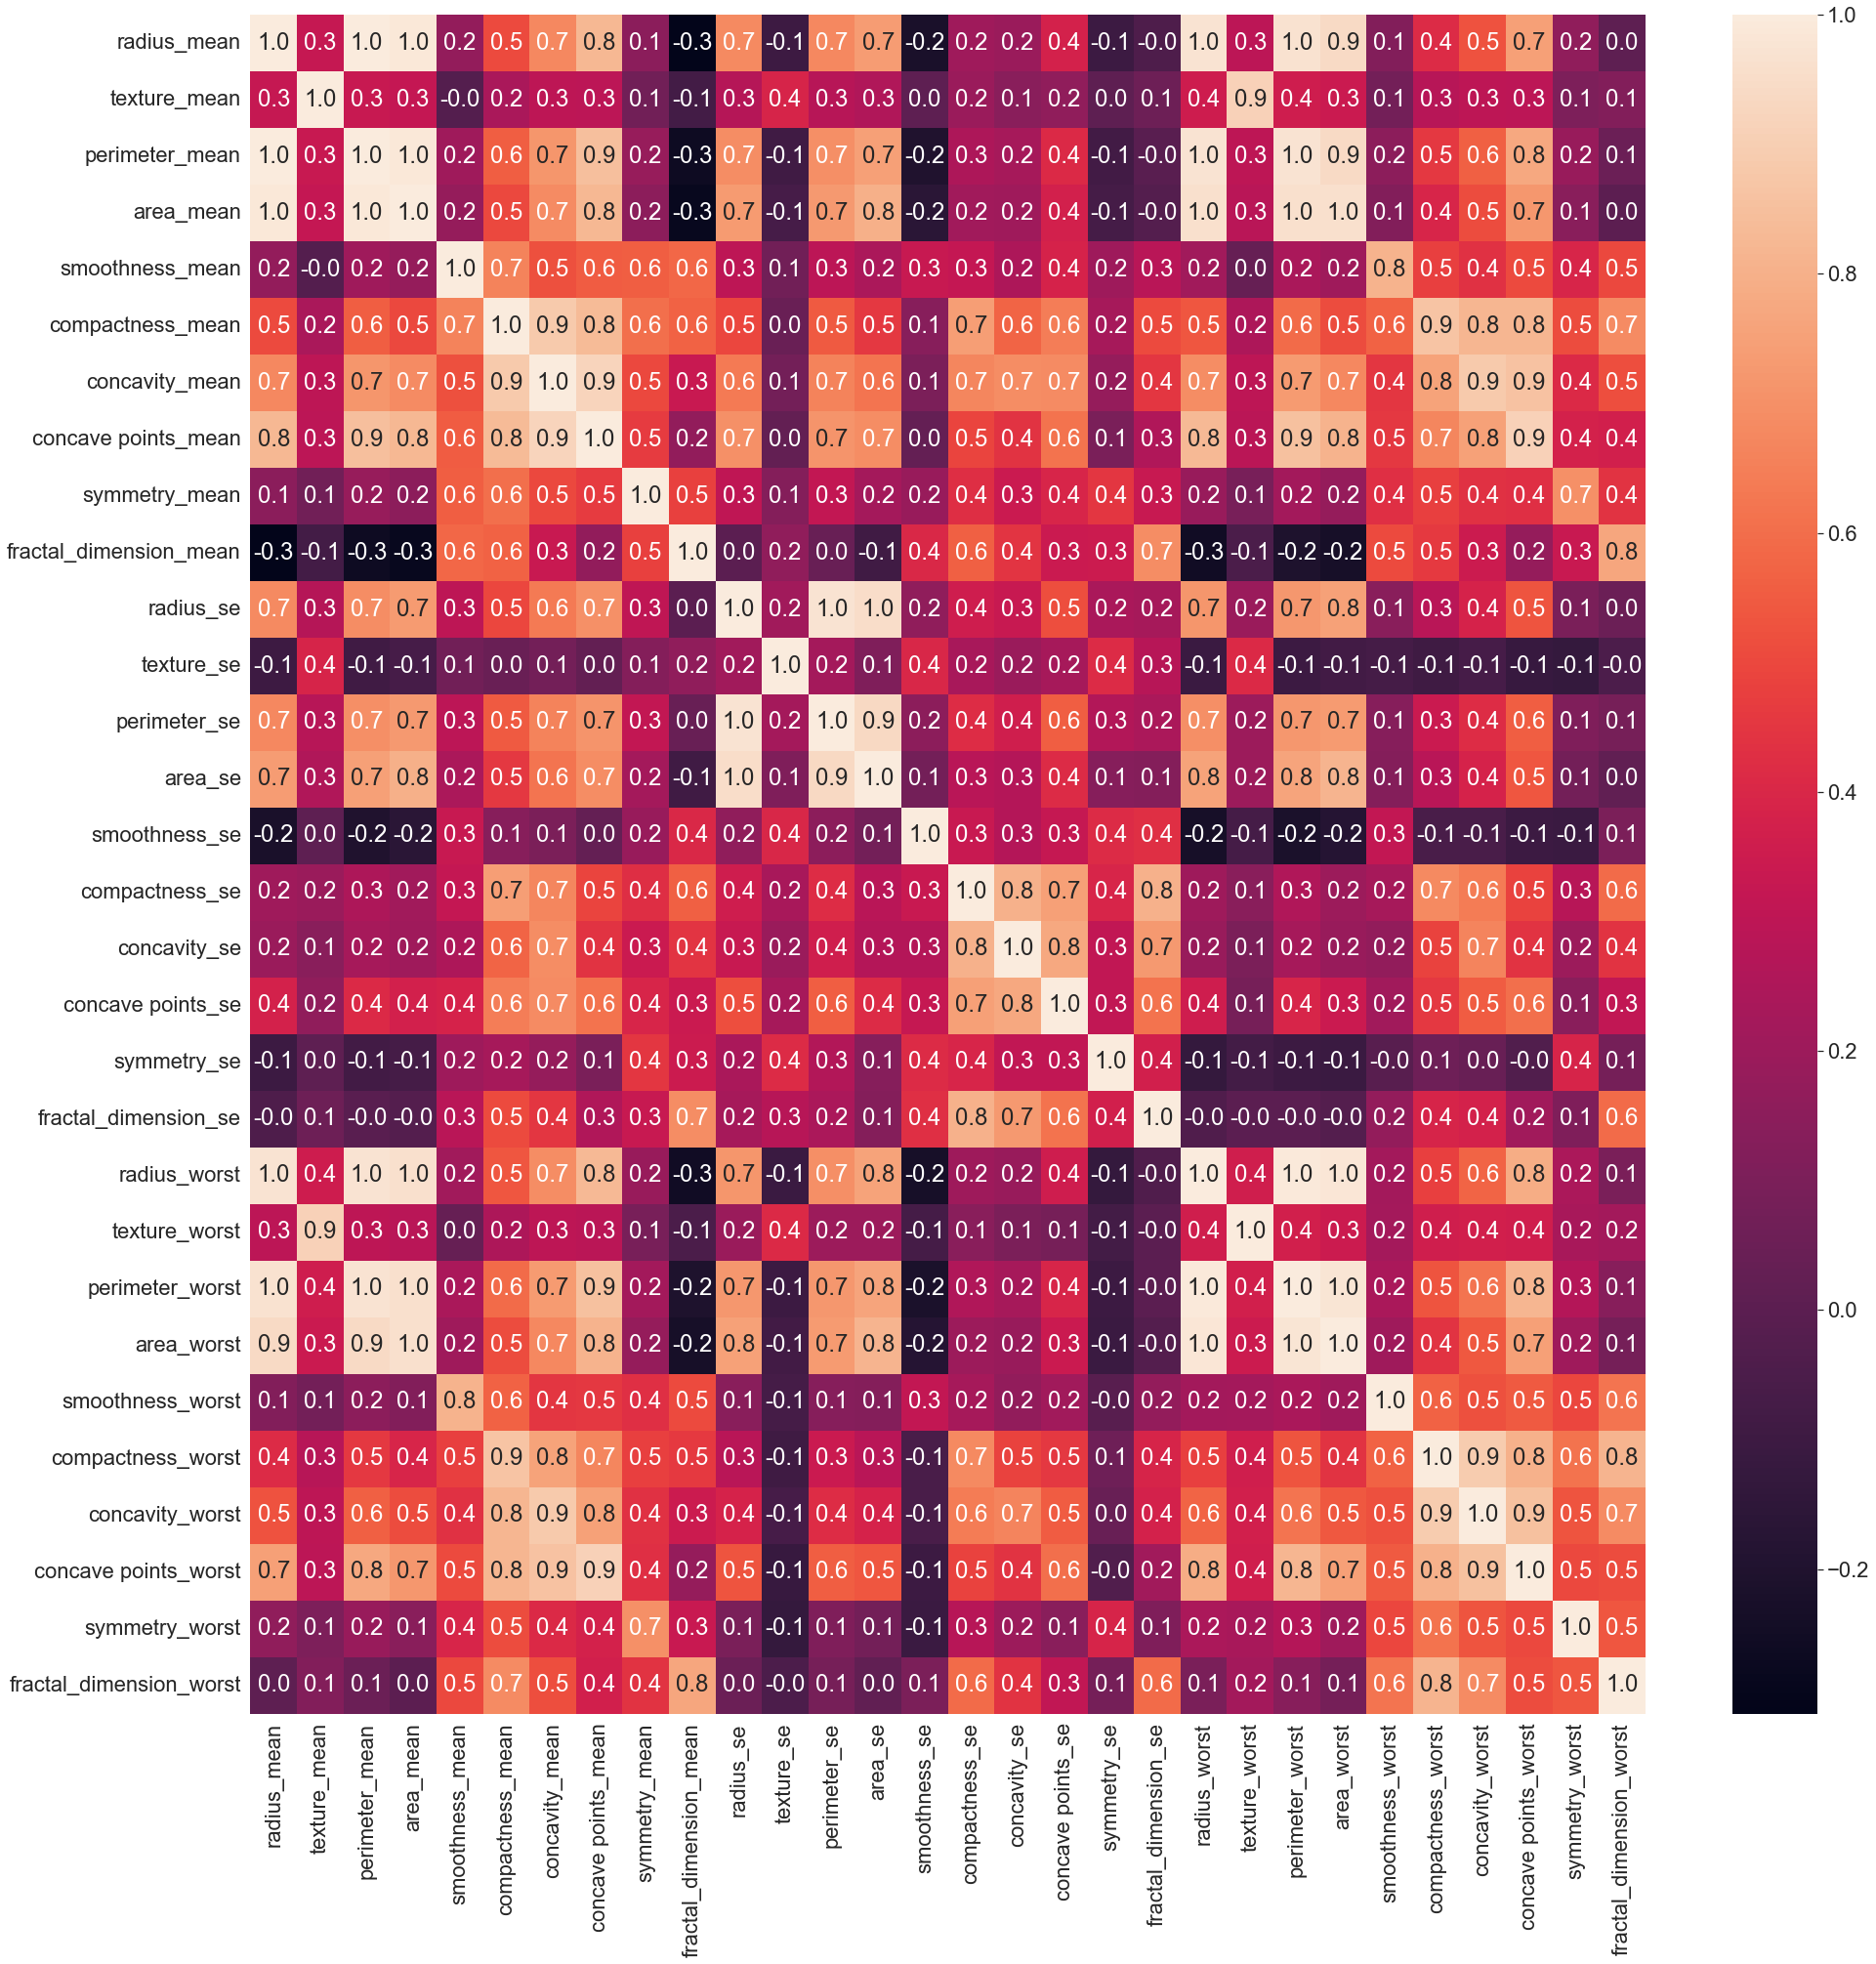

In [386]:

import numpy as np
import seaborn as sns

correlationMatriz= dataSet2.corr()
plt.figure(figsize = (32, 32))

sns.heatmap(correlationMatriz, annot = True, fmt = ".1f")

Coeficientes de Correlação:

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 09 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


A matriz funciona da seguinte forma, cada coluna do dataset é representada como uma linha e também como uma coluna. Os pontos 
da diagonal principal sempre vão ter correlação máxima de 1, pois se trata do mesmo item, linha e coluna. Em cada coluna é 
comparada a correlação com as demais, em relação as linhas (ou linhas em relação as colunas, tanto faz, é exatamente a mesma 
coisa).

Por exemplo, radius_mean tem correlação muito próxima de 1 (arredondado para 1) com perimeter_mean, area_mean, 
perimeter_worst e area_worst. Isso quer dizer que ambas possuem uma proporcionalidade entre si de forma direta. É como se 
a informação fosse a mesma, só que passada de forma numérica diferente, mas a informação é a mesma, como uma conversão do valor. Dessa forma não há necessidade de manter essas colunas.

In [387]:
correlationMatriz2 = correlationMatriz[correlationMatriz>0.99]
correlationMatriz2  = correlationMatriz2 .sum()
correlationMax = correlationMatriz2[correlationMatriz2>1]
correlationMax

radius_mean        1.997855
perimeter_mean     1.997855
radius_worst       1.993708
perimeter_worst    1.993708
dtype: float64

In [388]:
dataSet3=dataSet2.drop(columns=["perimeter_mean","radius_worst","perimeter_worst"])
dataSet3.head()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 7. StarndardScale

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
dataSet4 = dataSet3.drop('diagnosis', axis=1)
standardScaler = StandardScaler()
dataSet5=standardScaler.fit(dataSet4)
dataSet5 = standardScaler.transform(dataSet4)
dataSet5 = pd.DataFrame(data =dataSet5, columns = dataSet4.keys())
dataSet5.head()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Outliears

Para a identificação de possíveis outliers, pode ser verificado atráves do grafico boxplot. No gráfico é possível notar que diversos pontos estão acima do box, dessa forma não será visto como outlier por conta existir uma quantidade considerável de valores com tendência superior ao limite superior do box.

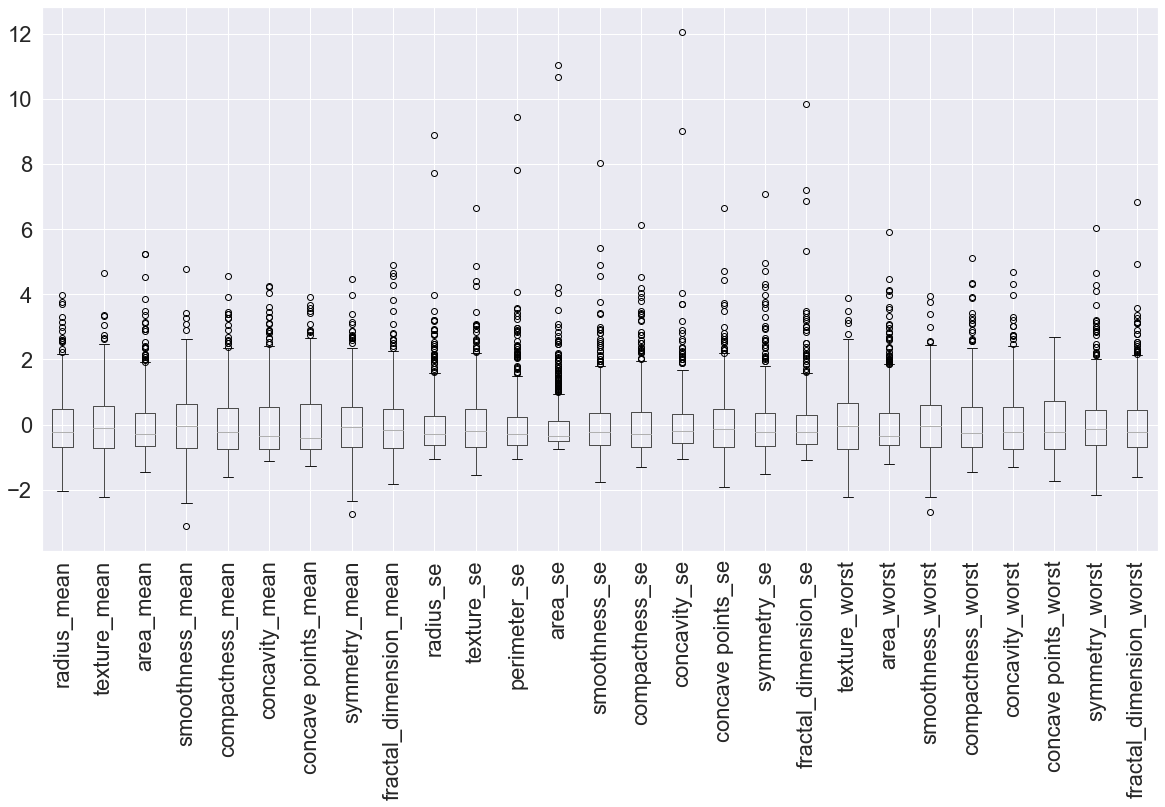

In [390]:
fig = plt.figure(figsize =(20, 10))
# Creating plot
dataSet5.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

Se for aplicar por exmplo o Normalize do SKlearn com norm l2, os resultados não parecem muito bons, pois ainda possuem dados para fora dos boxes. Então, não será utilizado, essa plot foi somente para demonstrar.

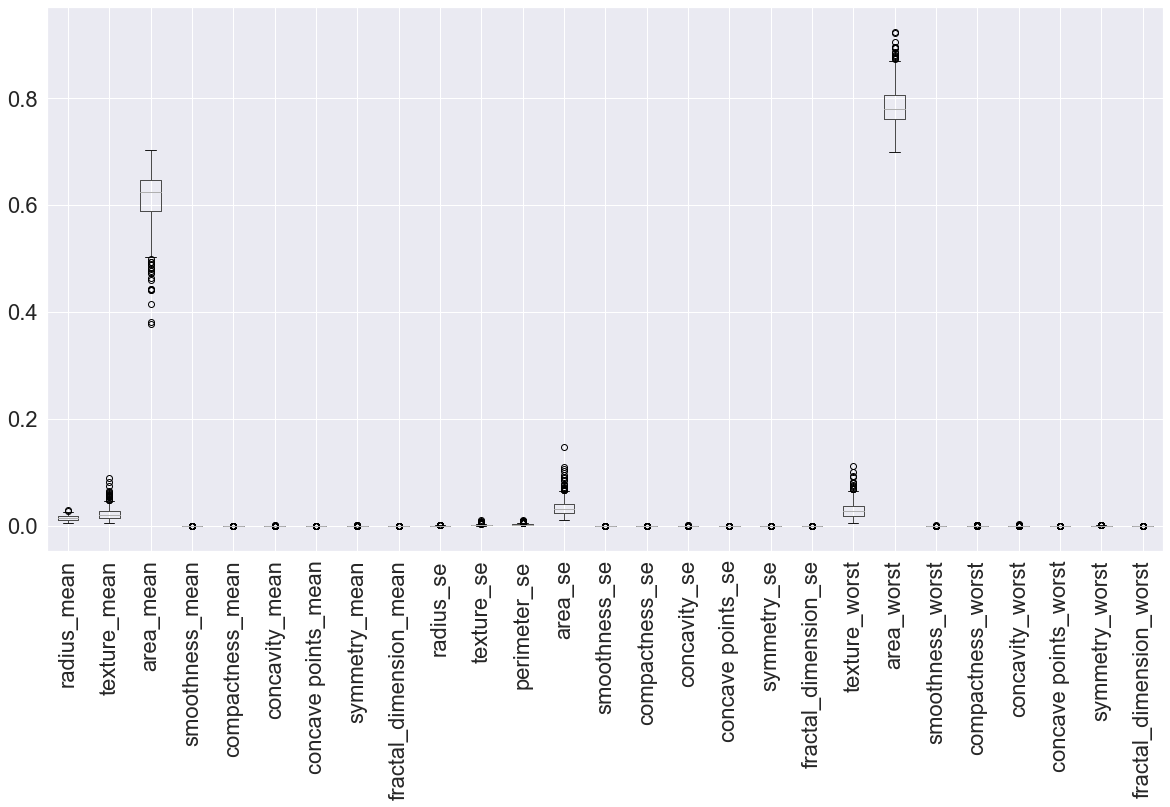

In [391]:
from sklearn.preprocessing import Normalizer

normalize = Normalizer()
dataSet6=normalize.fit(dataSet4)
dataSet6 = normalize.transform(dataSet4)
dataSet6 = pd.DataFrame(data =dataSet6, columns = dataSet4.keys())
dataSet6.head()


fig = plt.figure(figsize =(20, 10))
# Creating plot
dataSet6.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

O Power Transformer do SKlearn transforma os dados de forma ai fazer com que fiquem de forma mais gauciana, nessa visualização de box
fica melhor distribuido.

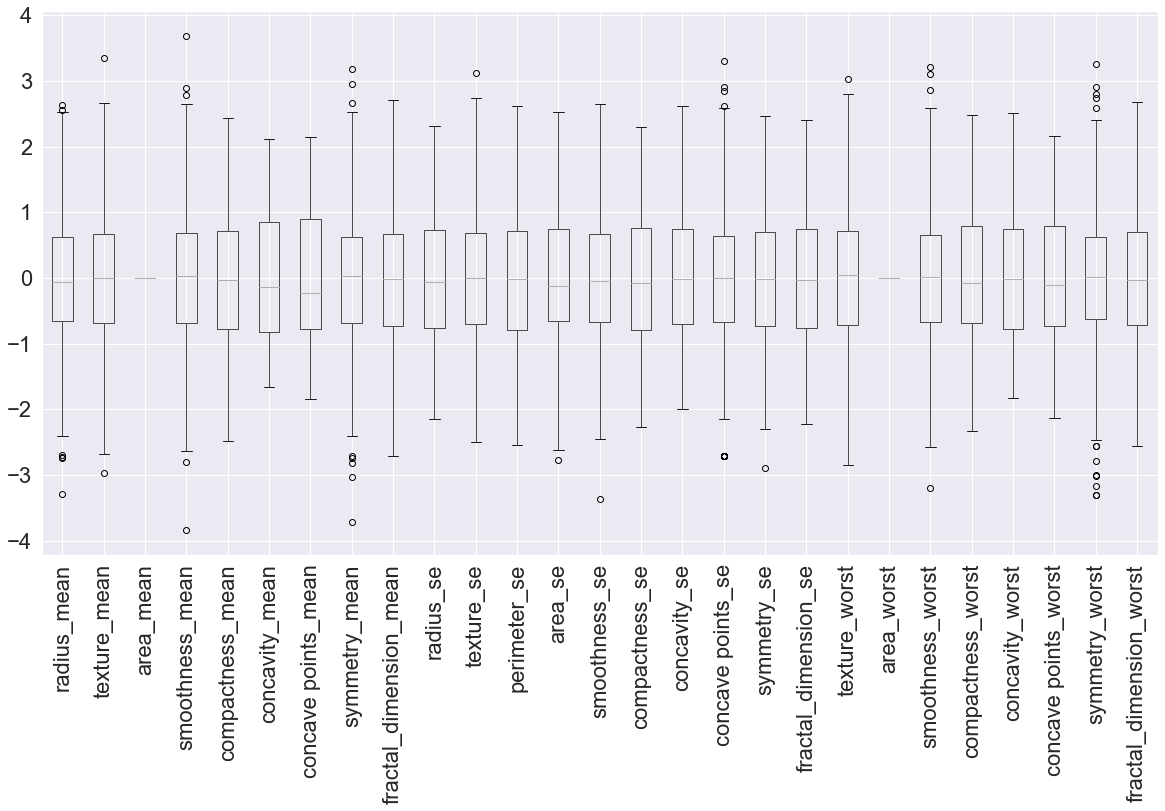

In [392]:
import numpy as np
from sklearn.preprocessing import PowerTransformer


normalize = PowerTransformer()
dataSet7=normalize.fit(dataSet4)
dataSet7 = normalize.transform(dataSet4)
dataSet7 = pd.DataFrame(data =dataSet7, columns = dataSet4.keys())
dataSet7.head()


fig = plt.figure(figsize =(20, 10))
# Creating plot
dataSet7.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

# 6. DummyClassifier

O DummyClassifier faz previsões que ignoram os recursos de entrada. Esse classificador serve como uma linha de base simples 
para comparação com outros classificadores mais complexos. Então, o primeiro algoritmo a ser aplicado será o DummyClassifier da biblioteca SKlearn. Dessa forma o objetivo é estabelecer os parâmetros mínimos de resultados, para na sequência poder comparar aos demais algoritmos de classificação.


In [393]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet5, target, random_state=SEED)
dummy = DummyClassifier(strategy= "most_frequent")
dummy.fit(train_x, train_y)
dummypredict = dummy.predict(test_x)
print("Resultado da classificação boba %.2f%%" % (dummy.score(test_x, test_y)* 100))

Resultado da classificação boba 63.64%


In [394]:
dummypredict

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype='<U1')

O algoritmo obteve uma taxa de acerto de 63,64% com a estratégia de “most_frequent” mais frequente. Basicamente ele verificou 
que o caso mais frequente é o de câncer é o tipo “B”, e assim descreveu todos os casos como sendo do Tipo “B”. Como esse tipo 
corresponde a aproximadamente a cerca de 60% dos casos, e nos dados de teste os tipo “B” são exatamente a taxa de acerto do 
Dummy em percentual de número de ocorrência em relação ao tipo ”M”.

# 6. Regressão logística

A regressão logística é um tipo de modelo de classificação estatística probabilística. Isto é usado como um modelo binário 
para prever uma resposta binária, o resultado de uma variável dependente (ou seja, o rótulo da classe), com base em uma ou 
mais variáveis (Igual , et al., 2017). A regressão logistica é um tipo de modelagem estátisca aplicada para classificação, ou seja aplicada para determinação de variáveis categóricas, que podem ser binárias ou não, porém categóricas, não continuas.
Diferente por exemplo da  regressão linear, que cria uma equação que melhor determina a relação entre váriáveis preditoras que são as utilizadas como variáveis entrada e a variável alvo.

In [395]:
from sklearn import preprocessing, model_selection, metrics
import random
import sklearn.linear_model as lm
model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)

print ("Test/total", len(xtest)/(len(xtest)+len(xtrain)))


df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    model.fit(xtrain, ytrain)      
    yhat_train = model.predict(xtrain)
    yhat_test  = model.predict(xtest)
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    model_map[modelname] = model
    print (modelname,metrics.classification_report (df_test[modelname], ytest))
df = pd.concat((df_train, df_test), axis=0)


Test/total 0.2513181019332162
default               precision    recall  f1-score   support

           B       0.97      0.98      0.97        90
           M       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

log_l1               precision    recall  f1-score   support

           B       0.96      0.98      0.97        89
           M       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

log_l2               precision    recall  f1-score   support

           B       0.96      0.98      0.97        89
           M       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.9

Foram testados 4 variações de algoritmos de regressão logistica. 

Default: Padrão sem nenhum parâmetro
log_l1: Penaulty =l1
log_l2: Penaulty =l2, Default
log_el: penalty=elasticnet, ambos l1 e l2

Os resultados foram muito proximos, em relação a acurária, o log_el teve o melhor resultado com 97%, enquanto log_l2 e o log_l1 teve 96% e o default 97%


[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

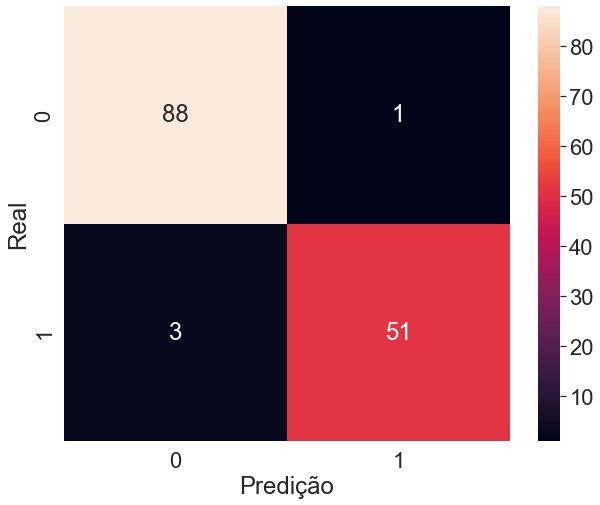

In [396]:
matriz = metrics.confusion_matrix(df_test['log_el'], ytest)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

Para a aplicação da regressão logística acima, existem 89 casos de tumor “B”, e desses o algoritmo previu 
corretamente 88. Da mesma forma, existem 54 de tumor tipo “M”, e o algoritmo previu corretamente 51. O algoritmo achou que 3 
eram do tipo “B”, mas na verdade eles eram do tipo “M”. E 1 ele pensou que era do tipo “M” e eram do tipo “B”.

Precisão: B: 97% e M: 98%, dos 91 casos que o modelo previu como tipo B, 88 estavam corretos e 3 errados, 88 Certos /91 Total. Para o tipo M, 51 correamente e errou em 1, 51 certos /52 total

Acurácia: Já na acurácia, 97% é o total de previsões corretas (88+51)/ total (88+51+3+1)

Sensibilidade/Recall: Tipo B, 88 acertos, 1 erros de um total de 89. Para o M, 51 acertos e 2 erros de um total de 54 casos reais.

F1-Score, calculo que leva em conta a precisão e a sensibilidade.  B: 98% e M 96%. O dobro da soma de ambos, didivido pela multiplicação



## Curva de validação Cruzada

O SEED utilizado na regressão logistica, fornece um número aleatório fixo para a modelagem, porém ser for realizado a mudança no valor, de 10 para outro valor, os resultados podem ser diferentes. Por isso o processo de validação cruxada é muito importante no processo de validação dos modelos. 

Será utilizado a biblioteca cross_validate do sklearn para realizar quebrar os dados em partes, e realizar treino e testes com 
partes diferentes, para que possa ser comparado os resultados. O parâmtro cv é o número de partes que será dividido o o modelo
durante a validação cruzada. Por padrão o cv possui StratifiedKFold = 10 com shuffle True para que haja aleatóriedade na vivisão em partes. E com folds estratificados, que preservam a proporcionalidade das amostras
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [397]:
def print_results_cross_validation(results, modelname):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("================",modelname,"=====================")
    print("Accuracy médio: %.1f" % (media * 100))
    print ("Intervalo padrão [%.1f , %.1f]" % ((media - desvio_padrao) *100, (media +  desvio_padrao)*100))

Esta função imprime a média das acurácias e o intervalo de desvio padrão.

In [398]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)


df_train = xtrain.copy()
df_test = xtest.copy()
resultsdf = pd.DataFrame([1,2,3,4,5], columns = ['ID'])

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)


================ default =====================
Accuracy médio: 97.0
Intervalo padrão [96.0 , 98.1]
================ log_l1 =====================
Accuracy médio: 97.7
Intervalo padrão [97.0 , 98.4]
================ log_l2 =====================
Accuracy médio: 97.4
Intervalo padrão [96.1 , 98.6]
================ log_el =====================
Accuracy médio: 98.2
Intervalo padrão [97.0 , 99.5]


Com a validação cruzada os resultados ficaram bem próximos de acurácia em todos os modelos, e também muito proximos nos intervalor. O gráfico abaixo mostra o resultado de cada fold da validação cruzada.

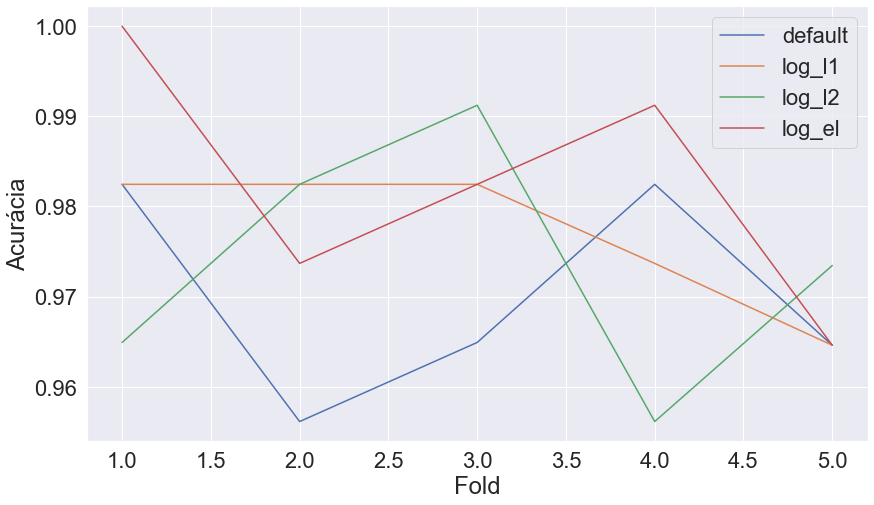

In [399]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Fold")
plt.ylabel("Acurácia")

plt.plot(resultsdf['ID'], resultsdf ['default'], label ='default')
plt.plot(resultsdf['ID'], resultsdf ['log_l1'], label ='log_l1')
plt.plot(resultsdf['ID'], resultsdf ['log_l2'], label = 'log_l2')
plt.plot(resultsdf['ID'], resultsdf ['log_el'], label ='log_el')
plt.legend() 
plt.show()

# 7. Arvore de Decisão

Esse modelo cria a estrutura de arvore para realizar através de lógicas condicionais. Para aplicação de uma arvoré de decisão será utilizado o DecisionTreeClassifier do Sklearn. Esse algoritmo possui um parâmetro importante, que e o max_depth (profundidade máxima da arvore. Para a arvore não será utilizado o dataSet5 que foi normalizado com o standard scale, poque a arvoré não perde precisão caso as feature estejam em diferentes escalas de magnitude.

In [400]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)


for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    model.fit(train_x, train_y)
    predict_y=model.predict(test_x)
    print("Profundidade",i,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
    print(metrics.classification_report(test_y, predict_y))
      

Profundidade 1 Resultado da classificação 92.31%
              precision    recall  f1-score   support

           B       0.92      0.97      0.94        91
           M       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143

Profundidade 2 Resultado da classificação 95.10%
              precision    recall  f1-score   support

           B       1.00      0.92      0.96        91
           M       0.88      1.00      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.95      0.95       143

Profundidade 3 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                       

Os resultados mostram que a arvoré com tamanho 3 e 4 possuem igual taxa de acerto, e maior taxa que as demais profundidades. 
Mas a precisão de acerto do Tipo “B” é melhor para profundidade 4, e do Tipo “M” para 3.

Profundidade 3 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Profundidade 4 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        91
           M       0.94      0.98      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143






Uma grande qualidade na arvore de decisão é poder verificar como o algoritmo realizou as escolhas. Nos plots abaixo, estão a 
arvore de tamanho 3 e tamanho 4. Em ambos a primeira separação é feita utilizando o valor do exame (area_worst <= 884.55). A 
maior parte das previsões tipo M estão para (area_worst <= 884.55 falso, ou seja maior que 884.55). Somente 5 casos foram 
preditos como tipo B após satisfazer essa condição.

In [401]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)

model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
model3.fit(train_x, train_y)
predict_y=model3.predict(test_x)

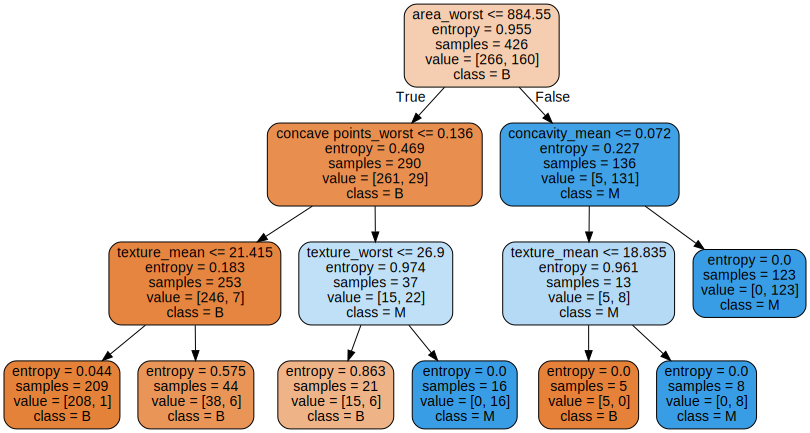

In [402]:
from sklearn.tree import export_graphviz
import graphviz
features=dataSet4.columns
dot_data =export_graphviz(model3, 
                          filled=True, rounded=True ,feature_names=features ,class_names = ["B" ,"M"])
grafico = graphviz.Source(dot_data)

grafico.format = "png"
grafico.render("./teste")
grafico

In [403]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)

model4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model4.fit(train_x, train_y)
predict_y=model3.predict(test_x)

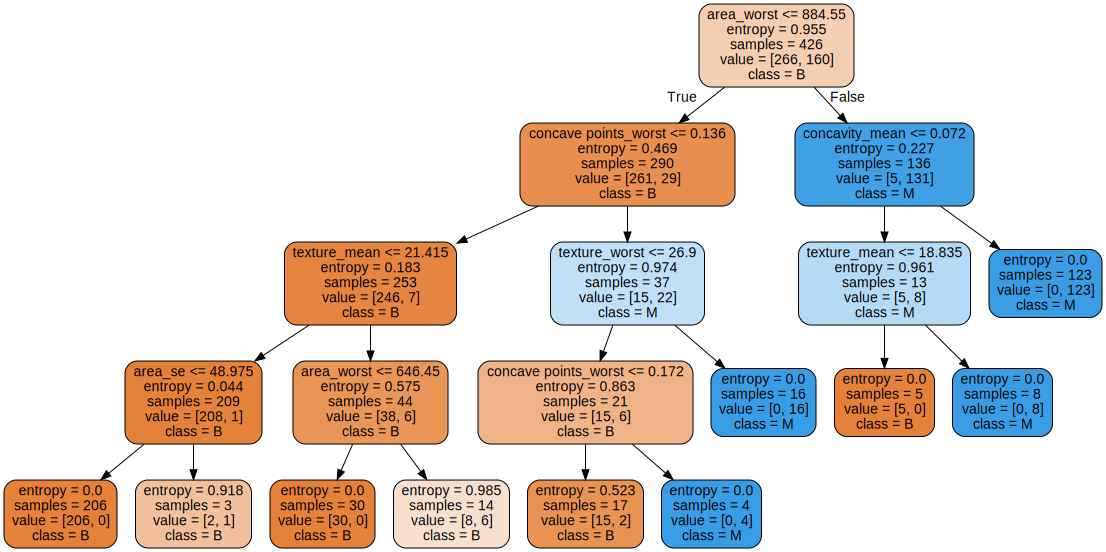

In [404]:
from sklearn.tree import export_graphviz
import graphviz
features=dataSet4.columns
dot_data =export_graphviz(model4, 
                          filled=True, rounded=True ,feature_names=features ,class_names = ["B" ,"M"])
grafico = graphviz.Source(dot_data)

grafico.format = "png"
grafico.render("./teste")
grafico

# Matriz de Confusão

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

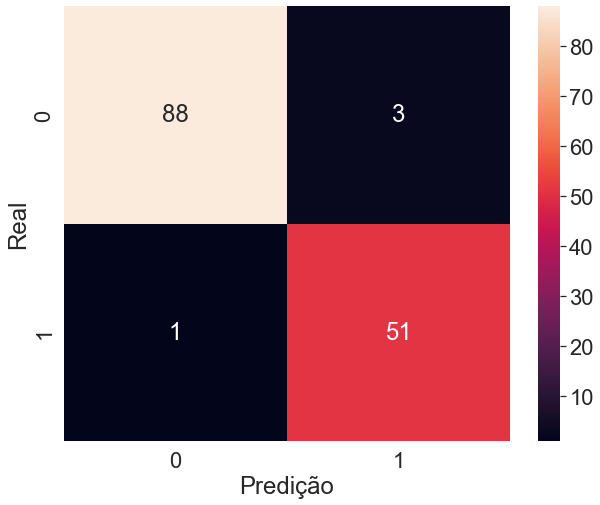

In [405]:

from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10

train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)

model4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model4.fit(train_x, train_y)
predict_y=model4.predict(test_x)

from sklearn.metrics import confusion_matrix
matriz_confision = confusion_matrix(test_y,predict_y)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confision, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

A arvore de decisão com profundidade 4, tem a matriz de confusão em que somente em 1 caso o algoritmo previu como tipo B e na
realidade era tipo M. Que para essa aplicação é o caso mais importante a ser reduzido, porque é um tipo de tumor com gravidade
por ser maligno e seria diagnosticado como benigno. Mas de qualquer forma o resultado está superior ao da regressão.

In [406]:
from sklearn import tree
from sklearn.metrics import accuracy_score
SEED = 10
train_x, test_x, train_y, test_y = train_test_split(dataSet4, target, random_state=SEED)


for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    model.fit(train_x, train_y)
    predict_y=model.predict(test_x)
    prob_test=model.predict_proba(test_x)[:,1]
    prob_train = model.predict_proba(train_x)[:,1]
    print("Profundidade",i,"Resultado da classificação %.2f%%" % (accuracy_score(predict_y, test_y)* 100))
    print(metrics.classification_report(test_y, predict_y))

Profundidade 1 Resultado da classificação 92.31%
              precision    recall  f1-score   support

           B       0.92      0.97      0.94        91
           M       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143

Profundidade 2 Resultado da classificação 95.10%
              precision    recall  f1-score   support

           B       1.00      0.92      0.96        91
           M       0.88      1.00      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.95      0.95       143

Profundidade 3 Resultado da classificação 97.20%
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                       

# Validação Cruzada

Também será utilizada a validação crizada na Arvore de decisão.

================ Profundidade: 1 =====================
Accuracy médio: 89.6
Intervalo padrão [87.1 , 92.2]
================ Profundidade: 2 =====================
Accuracy médio: 91.6
Intervalo padrão [89.4 , 93.7]
================ Profundidade: 3 =====================
Accuracy médio: 94.9
Intervalo padrão [92.8 , 97.0]
================ Profundidade: 4 =====================
Accuracy médio: 94.0
Intervalo padrão [91.0 , 97.1]
================ Profundidade: 5 =====================
Accuracy médio: 93.9
Intervalo padrão [92.9 , 94.8]
================ Profundidade: 6 =====================
Accuracy médio: 93.3
Intervalo padrão [89.2 , 97.4]
================ Profundidade: 7 =====================
Accuracy médio: 94.6
Intervalo padrão [92.4 , 96.7]
================ Profundidade: 8 =====================
Accuracy médio: 92.6
Intervalo padrão [90.1 , 95.1]
================ Profundidade: 9 =====================
Accuracy médio: 91.9
Intervalo padrão [89.9 , 93.9]


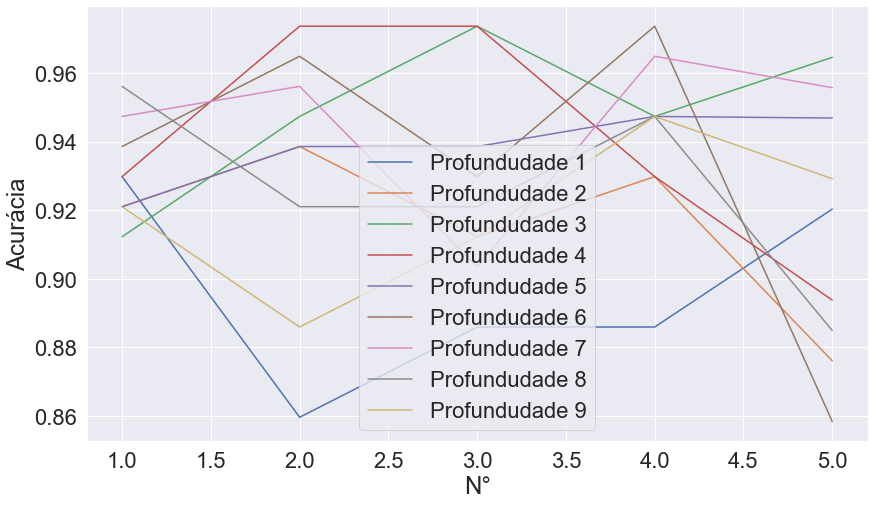

In [407]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle = True)
resultsdf = pd.DataFrame([1,2,3,4,5], columns = ['ID'])
X = dataSet4
Y = target


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")


for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    results = cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, "Profundidade: %d" %(i))
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [str(i)])], axis = 1)
    plt.plot(resultsdf['ID'], resultsdf [str(i)], label ='Profundudade %d'%i)
plt.legend() 
plt.show()

Desta vez somente a profundidae 4 teve o melhor rendimento, superando as outras.No gráfico abaixo, mostra que houve uma acurácia minima de 93% e máxima de 100% durante o teste de validação cruzada.

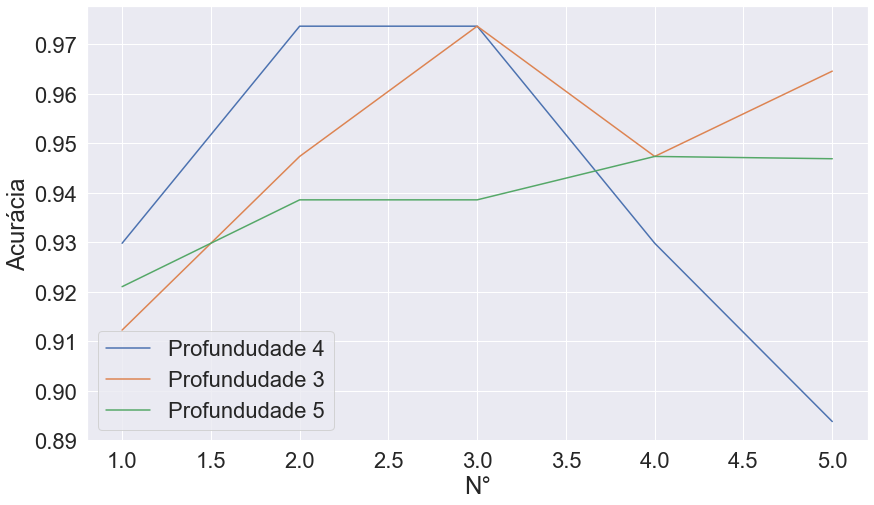

In [408]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")
plt.plot(resultsdf['ID'], resultsdf [str(4)], label ='Profundudade %d'%4)
plt.plot(resultsdf['ID'], resultsdf [str(3)], label ='Profundudade %d'%3)
plt.plot(resultsdf['ID'], resultsdf [str(5)], label ='Profundudade %d'%5)
plt.legend() 
plt.show()

# 8. Support Vector Machine

O Support vector machine é um algoritmo que pode ser utilizado na classificação, regressão, e detecção de valores discrepantes.
https://scikit-learn.org/stable/modules/svm.html. Para a modelagem abaixo, será realizado a comparação de alguns algoritmos SVC do sklearn com alteração do tipo de kernel.

In [409]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm
model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'svc_3': svm.SVC(kernel='poly', C=0.1, probability=True),
        'svc_4': svm.SVC(kernel='rbf', C=0.1, probability=True),
        'svc_5': svm.SVC(kernel='sigmoid', C=0.1, probability=True),
        #'svc_6': svm.SVC(kernel='precomputed', C=0.1, probability=True),
}

Y = target
X = dataSet5

SEED = 10

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, random_state=SEED)



df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    model.fit(xtrain, ytrain)      
    yhat_train = model.predict(xtrain)
    yhat_test  = model.predict(xtest)
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    model_map[modelname] = model
    print (modelname,metrics.classification_report (df_test[modelname], ytest))
df = pd.concat((df_train, df_test), axis=0)


svc_1               precision    recall  f1-score   support

           B       0.98      1.00      0.99        89
           M       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

svc_2               precision    recall  f1-score   support

           B       0.98      0.98      0.98        91
           M       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

svc_3               precision    recall  f1-score   support

           B       1.00      0.76      0.87       119
           M       0.46      1.00      0.63        24

    accuracy                           0.80       143
   macro avg       0.73      0.88      0.75       143
weighted avg       0.91      0.80      0.83       143

s

O svc_1 seguido pelo'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True) tiveram os melhores resultados dentro algumas váriações de SVC. Acurácia de 99% e 98, respectivamente. 
    

# Matrix de Confusão

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

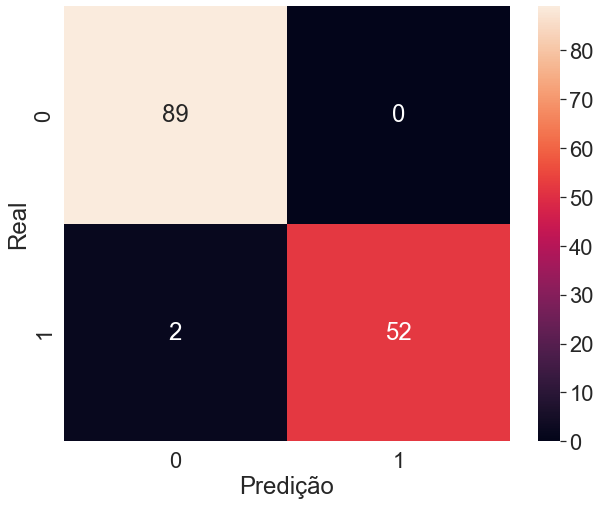

In [410]:
matriz = metrics.confusion_matrix(df_test['svc_1'], ytest)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

A matriz de confusão para o modelo SVC 1 com kernel default=’rbf’ mostra excelentes resultados, principalmente com a precisão do tipo M (100%), e o recall no tipo B (100%). Ou seja, não houve nenhum caso em que o modelo previu tipo M e era tipo B. Mas houve dois casos em que previu tipo B e era na verdade tipo M.

#  Validação Cruzada 

================ svc_1 =====================
Accuracy médio: 97.2
Intervalo padrão [96.8 , 97.6]
================ svc_2 =====================
Accuracy médio: 97.7
Intervalo padrão [96.7 , 98.8]
================ svc_3 =====================
Accuracy médio: 81.5
Intervalo padrão [78.8 , 84.3]
================ svc_4 =====================
Accuracy médio: 94.2
Intervalo padrão [92.4 , 96.0]
================ svc_5 =====================
Accuracy médio: 95.1
Intervalo padrão [93.3 , 96.9]


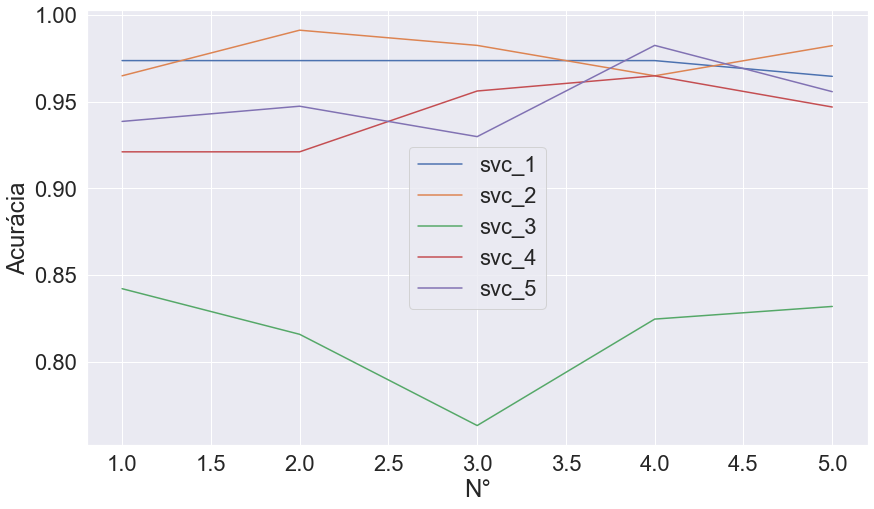

In [411]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm
model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'svc_3': svm.SVC(kernel='poly', C=0.1, probability=True),
        'svc_4': svm.SVC(kernel='rbf', C=0.1, probability=True),
        'svc_5': svm.SVC(kernel='sigmoid', C=0.1, probability=True),
        #'svc_6': svm.SVC(kernel='precomputed', C=0.1, probability=True),
}
cv = KFold(n_splits = 5, shuffle = True)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("N°")
plt.ylabel("Acurácia")

Y = target
X = dataSet5
resultsdf = pd.DataFrame([1,2,3,4,5], columns = ['ID'])

df_train = xtrain.copy()
df_test = xtest.copy()

for modelname, model in model_map.items():
    
    model_map[modelname] = model
    results=cross_validate(model, X, Y, cv=cv, return_train_score=False)
    print_results_cross_validation(results, modelname)
    resultsdf = pd.concat([resultsdf, pd.DataFrame(results['test_score'],columns = [modelname])], axis = 1)
    plt.plot(resultsdf['ID'], resultsdf [modelname], label = modelname)
plt.legend() 
plt.show()

O kernel='linear', C=0.1, probability=True e o padrão tiveram o melhor resultado com acurácias de 97,50 % (média). E intervalo de 95,2% - 99,9% para o SVC_1 (padrão) e SVC_2 (kernel linear) 99,9 e 100%.

# 9. Conclusão e Comparação de Modelos

 Na comparação entre os modelos dos modelos com os dados utilizados com o treinamento com a amostragem e com os resultados com validação cruzada.


# Regressão Logistica

In [456]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}
X=dataSet7
cv = StratifiedKFold(n_splits = 5, shuffle = False)
print("{}\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Preci","Recall", "F1-Score"))
print("-----------------------------------------")
for modelname, model in model_map.items():
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))
    



Modelo	Acuracy	Prec	Recall	F1-Score
-----------------------------------------
default	 97.19	 97.19	 96.81	 96.98%
log_l1	 98.07	 98.18	 97.70	 97.92%
log_l2	 97.37	 97.43	 96.95	 97.17%
log_el	 97.37	 97.43	 96.95	 97.17%


Comparação dos resultados dos modelos utilizando cross_val_score do sklearn com KFold Stratified com 5 Folds (default) e calculando a média da Acurácia, Precisão, Recall e F1Score. shuffle = False para não gerar resultados diferentes a cada execução.

Maiores resultados: 

    Acurácia: log_l1
    
    Precisão: log_l1
    
    Recall: log_l1
    
    f1-score: log_l1
    
    
O modelo log_l1 ficou com resultados melhores em todas as metricas utilizadas. 

In [413]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}

Y=DataBin
cv = StratifiedKFold(n_splits = 5, shuffle = False)

for modelname, model in model_map.items():
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision')
    precision_m = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall')
    recall_m = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("Modelo:\t{}\tAcurácia\t{:.2f}\tPrecisão:\tM {:.2f}/{:.2f}\trecall:\tM {:.2f}/{:.2f}\tf1:\t{:.2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, precision_m.mean()*100, 
                  recall.mean()*100, recall_m.mean()*100, scoref1.mean()*100))

Modelo:	default	Acurácia	97.19	Precisão:	M 97.14/97.19	recall:	M 95.29/96.81	f1:	96.98%
Modelo:	log_l1	Acurácia	98.07	Precisão:	M 98.56/98.18	recall:	M 96.25/97.70	f1:	97.92%
Modelo:	log_l2	Acurácia	97.37	Precisão:	M 97.61/97.43	recall:	M 95.29/96.95	f1:	97.17%
Modelo:	log_el	Acurácia	97.37	Precisão:	M 97.61/97.43	recall:	M 95.29/96.95	f1:	97.17%


Recall e Precisão para o Tipo M comparado com o Total.

Atenção: O modelo Default tem os mesmos resultados do log_l2 porque o penalty default=’l2’, ou seja, sem preencher esse hiperparâmetro, sele será atribuído l2. Porém mantive para justamente verificar se haveria diferença, por conta de outro hiperparâmetro.

# Curva ROC

Os gráficos abaixo, mostram as curvas ROC dos algoritmos de regressão logisticas em relação a divisão em folds e a média. E por fim, a compração
direta entre a média dos 3 resultados.

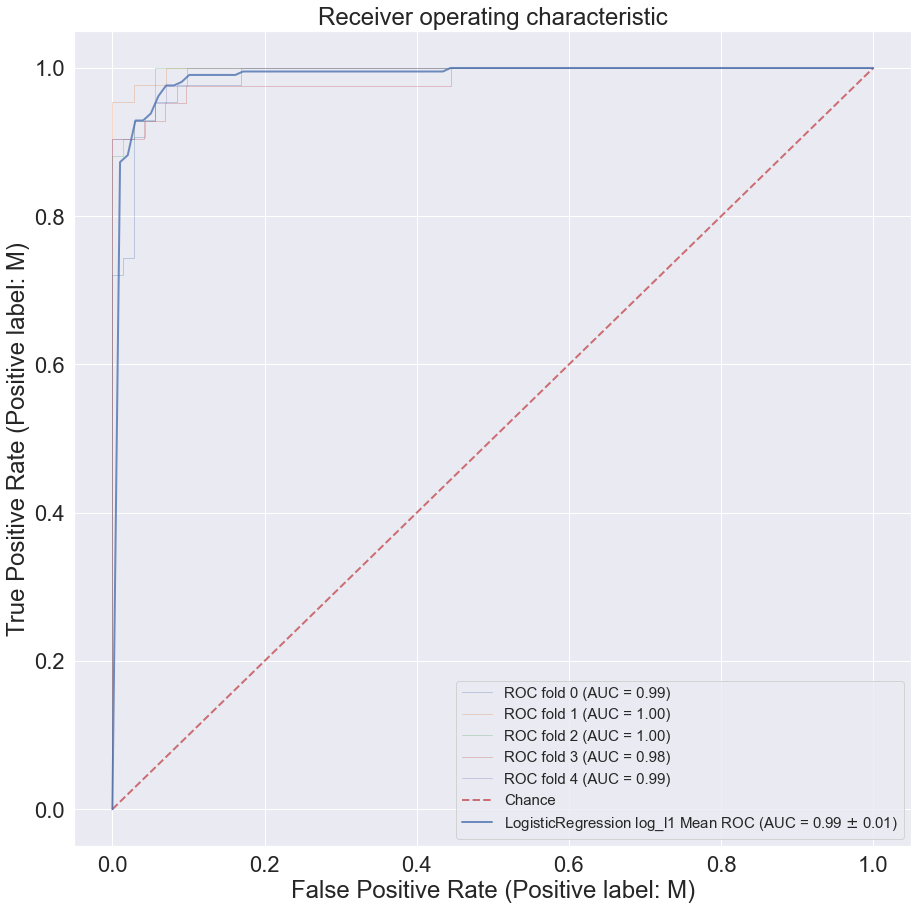

In [471]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet7
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

modelname= 'log_l1'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label="LogisticRegression log_l1 Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

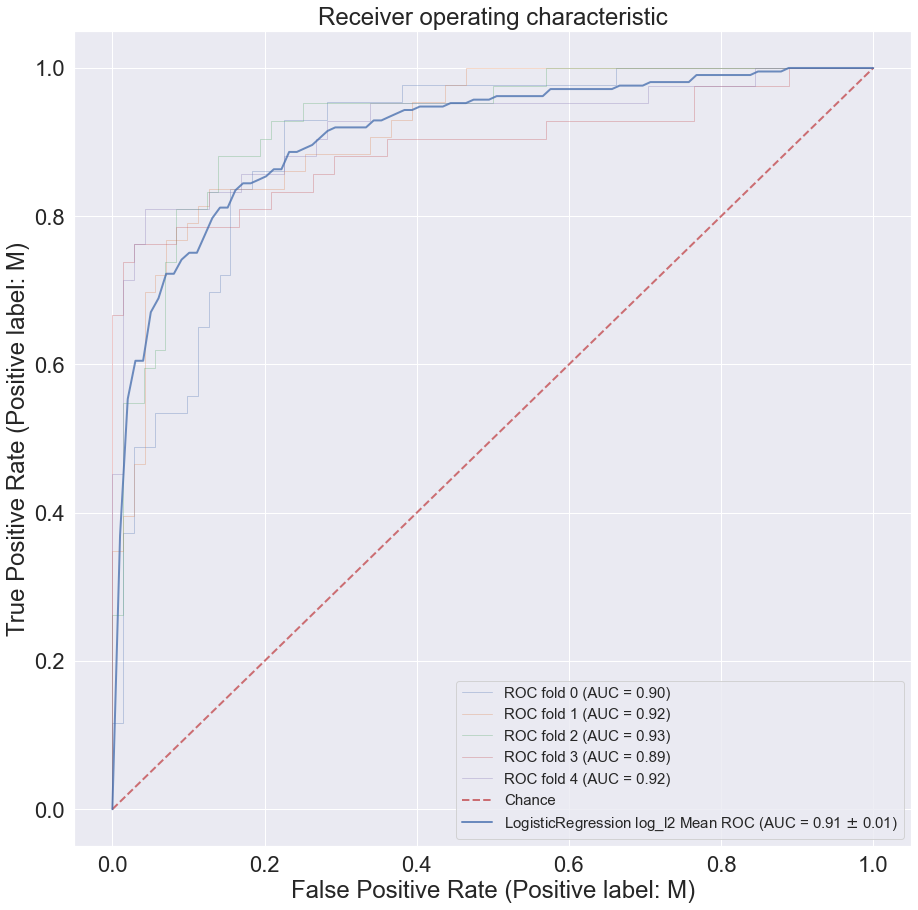

In [472]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0)

modelname= 'log_l2'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label="LogisticRegression log_l2 Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

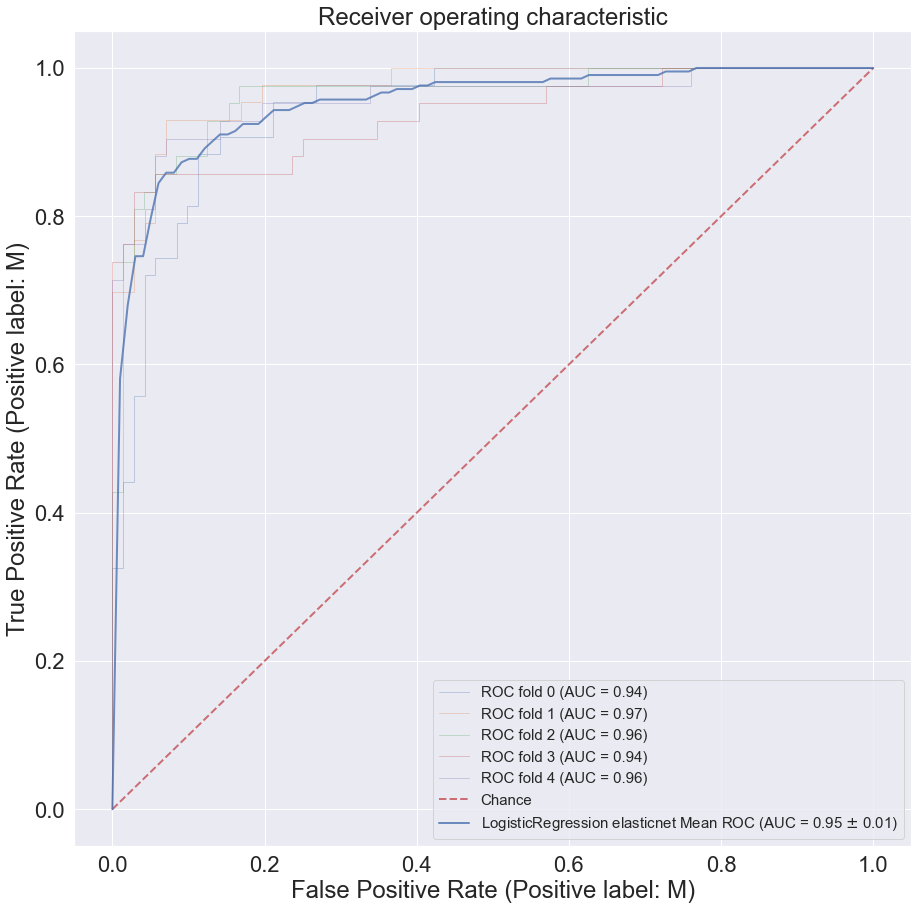

In [473]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0)

modelname= 'log_el'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label="LogisticRegression elasticnet Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

Comparação

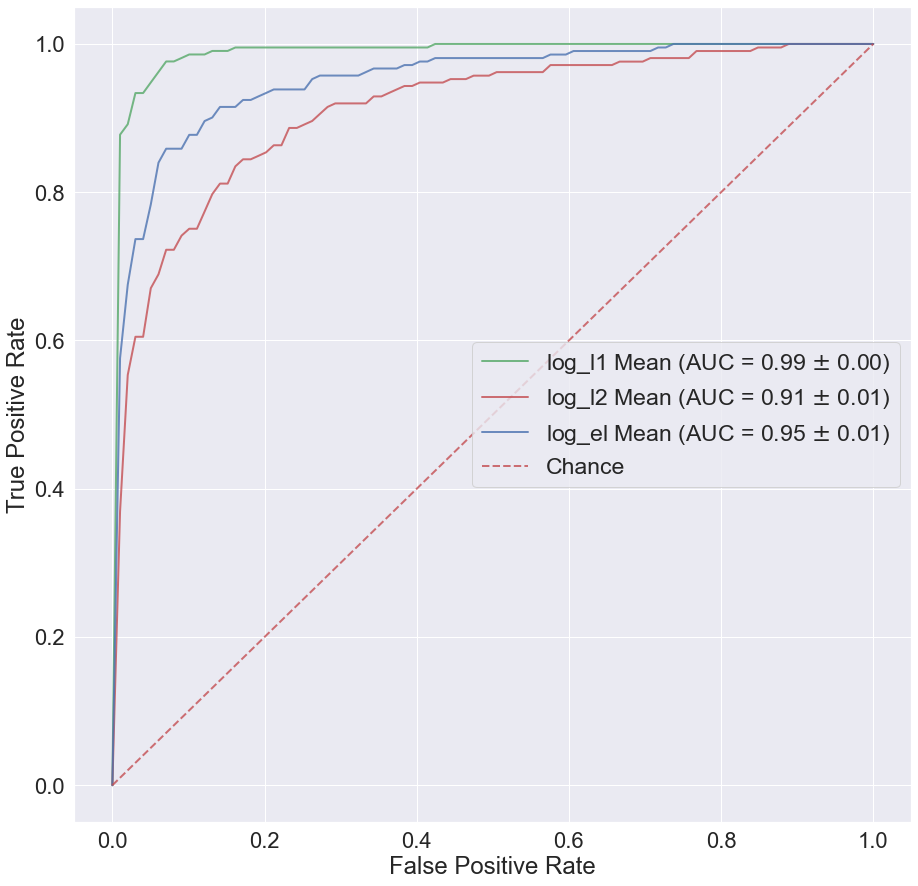

In [417]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

        
ax.plot(display ['log_l1']['fpr'],
        display ['log_l1']['tpr'], 
        color='g',
        label=r"log_l1 Mean (AUC = %0.2f $\pm$ %0.2f)" % (display ['log_l1']['auc'], 
                                                                    display ['log_l1']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['log_l2']['fpr'], 
        display ['log_l2']['tpr'],
        color='r',
        label=r"log_l2 Mean (AUC = %0.2f $\pm$ %0.2f)" % (display ['log_l2']['auc'], 
                                                          display ['log_l2']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['log_el']['fpr'], 
        display ['log_el']['tpr'],
        color='b',
        label=r"log_el Mean (AUC = %0.2f $\pm$ %0.2f)" % (display ['log_el']['auc'], 
                                                                                       display ['log_el']['std']),
        lw=2,
        alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)        
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.legend(loc="center right", prop={'size': 23})
plt.show()

Pela curva roc dos 3 modelos, o log_l1 teve resultado superior na curva. 

# Arvoré de Decisão

Na comparação as arvores de dicisão, foi realizado uma tabulação dos resultados médios após a validação cruzada com 
StratifiedKFold, 10 folds e shuffle = False, para evitar resultados diferentes nas execuções.

In [461]:
from sklearn import tree
from sklearn.metrics import accuracy_score



cv = StratifiedKFold(n_splits = 5, shuffle = False)

print("{}\t\t\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Prec","Recall", "F1-Score"))
print("------------------------------------------------------------------")
for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    modelname='Tree max_depth {}'.format(i)
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))

Modelo			Acuracy	Prec	Recall	F1-Score
------------------------------------------------------------------
Tree max_depth 1	 89.10	 89.17	 87.98	 88.23%
Tree max_depth 2	 90.51	 89.78	 90.63	 90.00%
Tree max_depth 3	 92.97	 92.95	 92.03	 92.40%
Tree max_depth 4	 91.38	 91.54	 91.94	 91.04%
Tree max_depth 5	 92.10	 92.01	 92.74	 92.90%
Tree max_depth 6	 92.44	 91.80	 91.27	 92.74%
Tree max_depth 7	 91.92	 91.42	 91.99	 91.79%
Tree max_depth 8	 92.62	 91.41	 92.22	 92.13%
Tree max_depth 9	 91.91	 91.63	 92.45	 92.13%


Maiores resultados: 

    Acurácia: max_depth 3
    
    Precisão: max_depth 3
    
    Recall: max_depth 3
    
    f1-score: max_depth 3

In [419]:
from sklearn import tree
from sklearn.metrics import accuracy_score



cv = StratifiedKFold(n_splits = 5, shuffle = False)


for i in range(1, 10):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    modelname='Tree max_depth {}'.format(i)
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision')
    precision_m = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall')
    recall_m = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("Modelo:\t{}\tAcurácia\t{:.2f}\tPrecisão:\tM {:.2f}/{:.2f}\trecall:\tM {:.2f}/{:.2f}\tf1:\t{:.2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, precision_m.mean()*100, 
                  recall.mean()*100, recall_m.mean()*100, scoref1.mean()*100))

Modelo:	Tree max_depth 1	Acurácia	89.98	Precisão:	M 91.80/90.77	recall:	M 81.18/88.21	f1:	88.98%
Modelo:	Tree max_depth 2	Acurácia	92.26	Precisão:	M 87.20/91.58	recall:	M 93.40/92.49	f1:	91.86%
Modelo:	Tree max_depth 3	Acurácia	94.56	Precisão:	M 95.98/95.33	recall:	M 89.67/93.48	f1:	94.26%
Modelo:	Tree max_depth 4	Acurácia	93.67	Precisão:	M 94.16/93.96	recall:	M 89.66/92.49	f1:	93.72%
Modelo:	Tree max_depth 5	Acurácia	94.03	Precisão:	M 92.46/92.22	recall:	M 91.06/92.00	f1:	92.44%
Modelo:	Tree max_depth 6	Acurácia	93.15	Precisão:	M 90.12/91.78	recall:	M 89.66/93.10	f1:	92.11%
Modelo:	Tree max_depth 7	Acurácia	92.97	Precisão:	M 90.73/91.90	recall:	M 91.06/92.88	f1:	92.82%
Modelo:	Tree max_depth 8	Acurácia	92.79	Precisão:	M 89.99/92.17	recall:	M 89.19/93.30	f1:	94.12%
Modelo:	Tree max_depth 9	Acurácia	93.68	Precisão:	M 92.84/91.80	recall:	M 90.60/93.30	f1:	92.62%


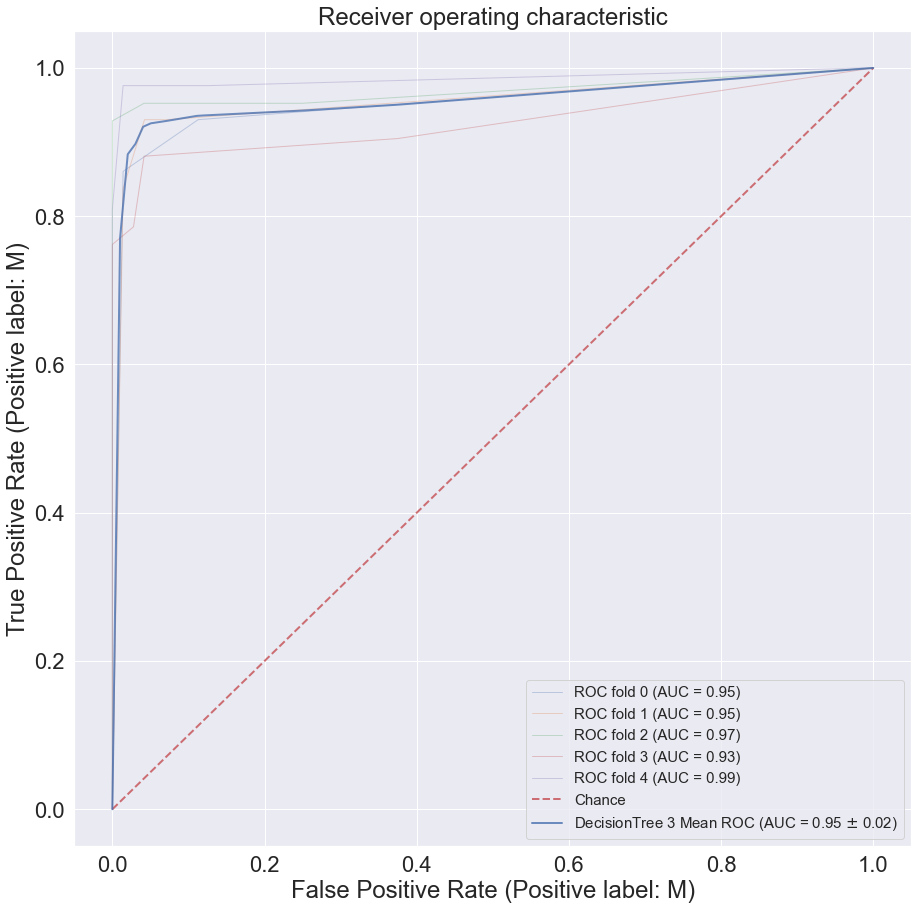

In [420]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

modelname= 'DecisionTreeClassifier 3'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label="DecisionTree 3 Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

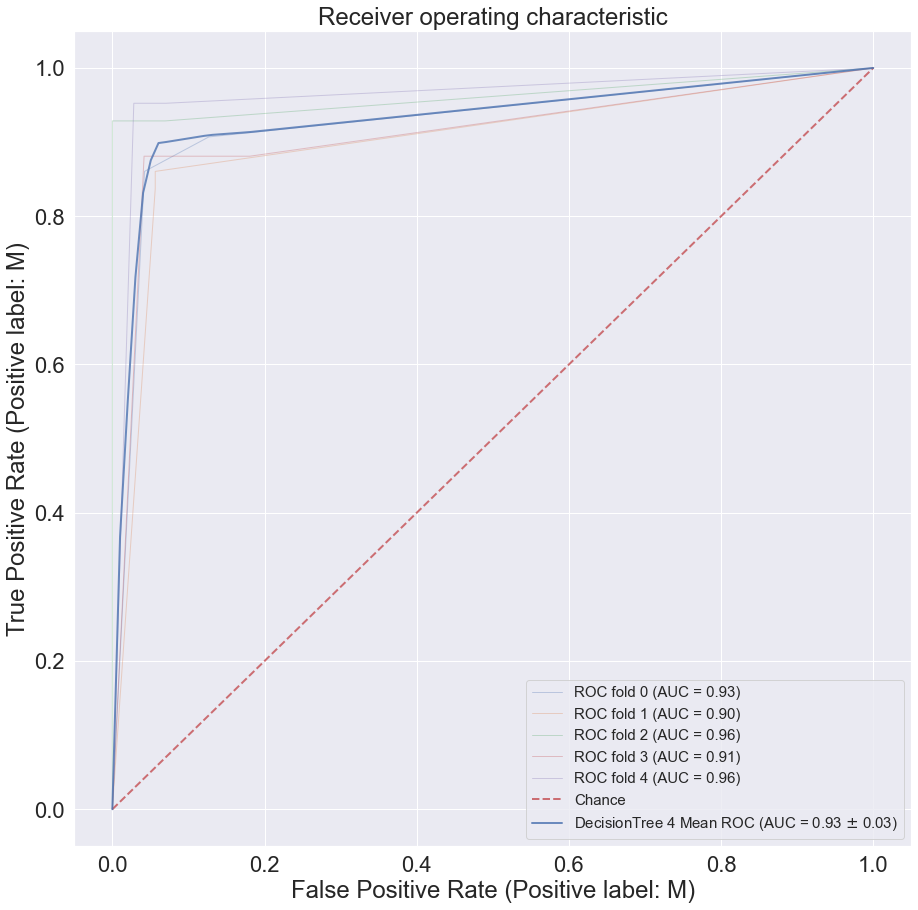

In [421]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)

modelname= 'DecisionTreeClassifier 4'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label="DecisionTree 4 Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

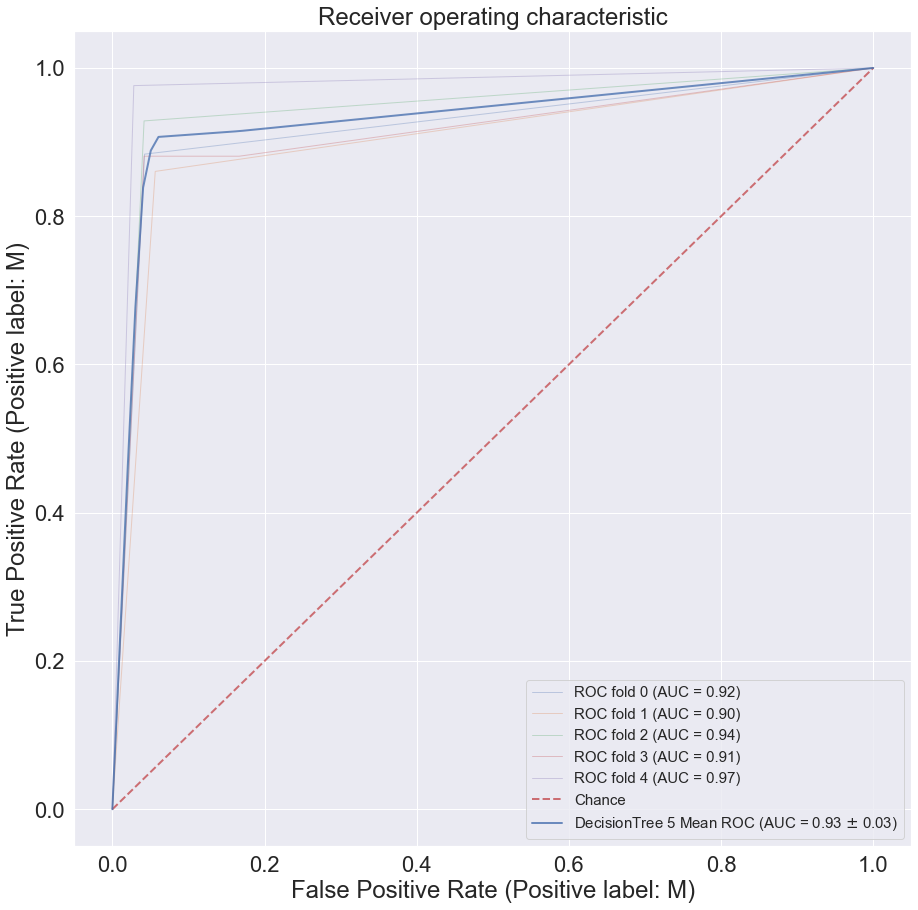

In [422]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)

modelname= 'DecisionTreeClassifier 5'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label="DecisionTree 5 Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

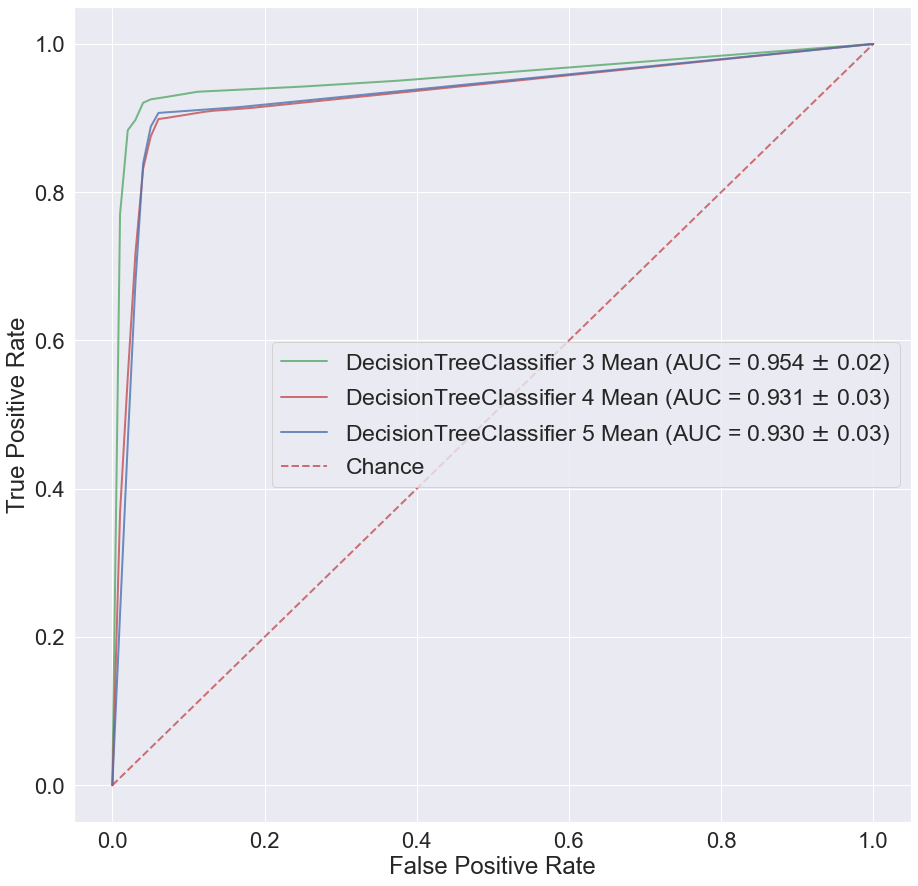

In [423]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

        
ax.plot(display ['DecisionTreeClassifier 3']['fpr'],
        display ['DecisionTreeClassifier 3']['tpr'], 
        color='g',
        label=r"DecisionTreeClassifier 3 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['DecisionTreeClassifier 3']['auc'], 
                                                                    display ['DecisionTreeClassifier 3']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['DecisionTreeClassifier 4']['fpr'], 
        display ['DecisionTreeClassifier 4']['tpr'],
        color='r',
        label=r"DecisionTreeClassifier 4 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['DecisionTreeClassifier 4']['auc'], 
                                                          display ['DecisionTreeClassifier 4']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['DecisionTreeClassifier 5']['fpr'], 
        display ['DecisionTreeClassifier 5']['tpr'],
        color='b',
        label=r"DecisionTreeClassifier 5 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['DecisionTreeClassifier 5']['auc'], 
                                                        display ['DecisionTreeClassifier 5']['std']),
        lw=2,
        alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)        
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.legend(loc="center right", prop={'size': 23})
plt.show()

Na comparação entre as curvas ROC dos melhores modelos acima, também utilizando validação cruzada com 5 folds. O modelo com tamanho 3
teve melhor resultado. Para poder ser possível visualizar foi ajustado o valor do AUC médio para 3 casas decimais, porque senão os tamanho 4 e 3 seriam mostrados ambos com 94%

# Support Vector Machine

In [483]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm

X=dataSet5

model_map = {
        'svc_1': svm.SVC(),
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'svc_3': svm.SVC(kernel='poly', C=0.1, probability=True),
        'svc_4': svm.SVC(kernel='rbf', C=0.1, probability=True),
        'svc_5': svm.SVC(kernel='sigmoid', C=0.1, probability=True),
        #'svc_6': svm.SVC(kernel='precomputed', C=0.1, probability=True),
}

cv = StratifiedKFold(n_splits = 5, shuffle = False)
print("{}\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Prec","Recall", "F1-Score"))
print("------------------------------------------------------------------")
for modelname, model in model_map.items():
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))

Modelo	Acuracy	Prec	Recall	F1-Score
------------------------------------------------------------------
svc_1	 97.72	 97.83	 97.32	 97.54%
svc_2	 97.19	 97.44	 96.60	 96.96%
svc_3	 81.73	 88.41	 75.58	 77.39%
svc_4	 94.73	 95.21	 93.70	 94.27%
svc_5	 94.91	 95.85	 93.45	 94.41%


Os resultados foram melhores para o SVC_2

Maiores resultados:

Acurácia: svc_2

Precisão: svc_2

Recall: svc_2

f1-score: svc_2

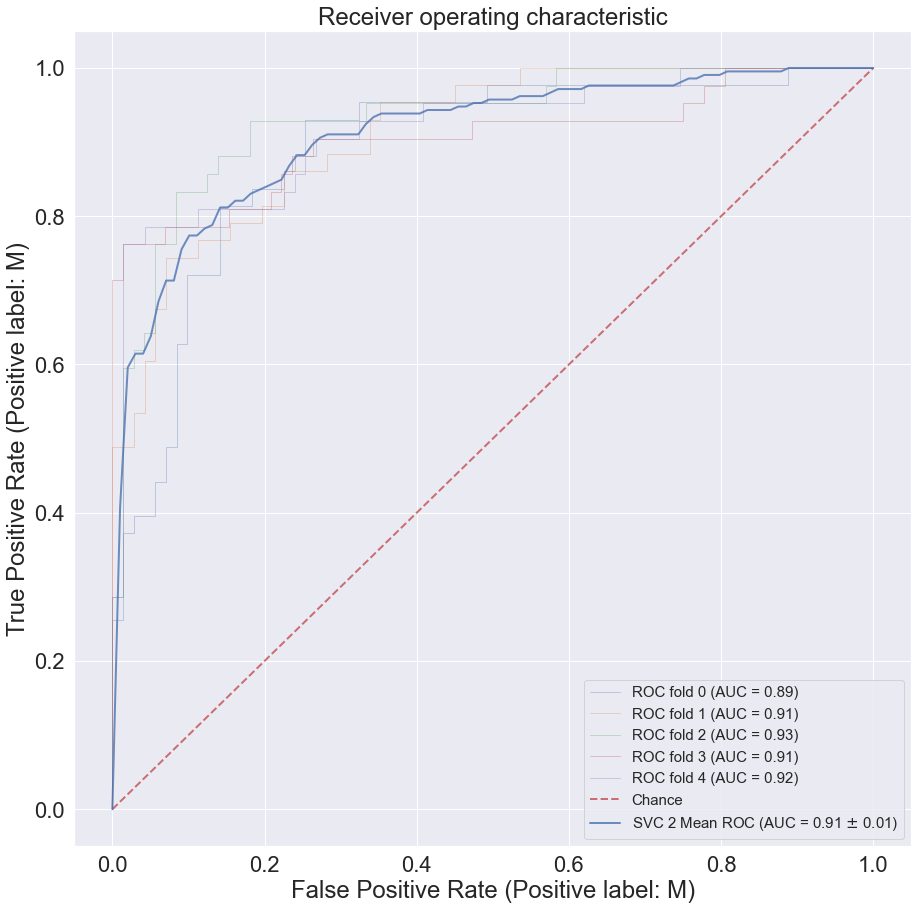

In [484]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model=svm.SVC(kernel='linear', C=0.1, probability=True)

modelname= 'SVC 2'

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=modelname+" Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

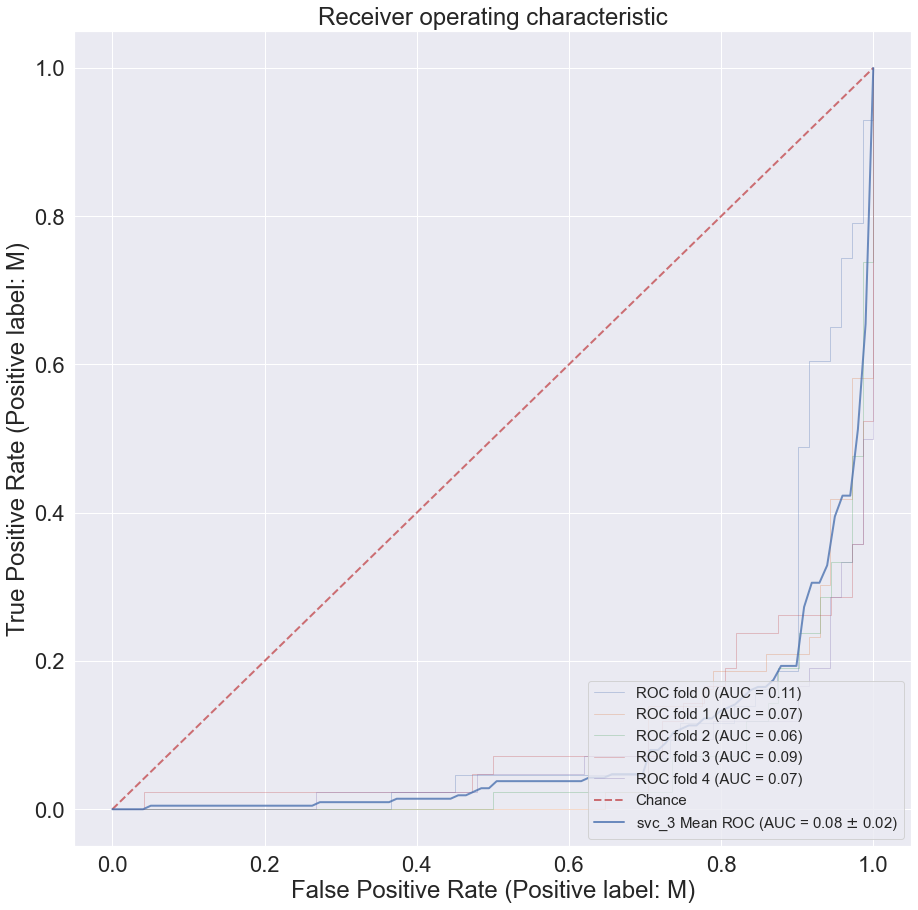

In [485]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

modelname= 'svc_3'
model=svm.SVC(kernel='poly', C=0.1, probability=True)



fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=modelname+" Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

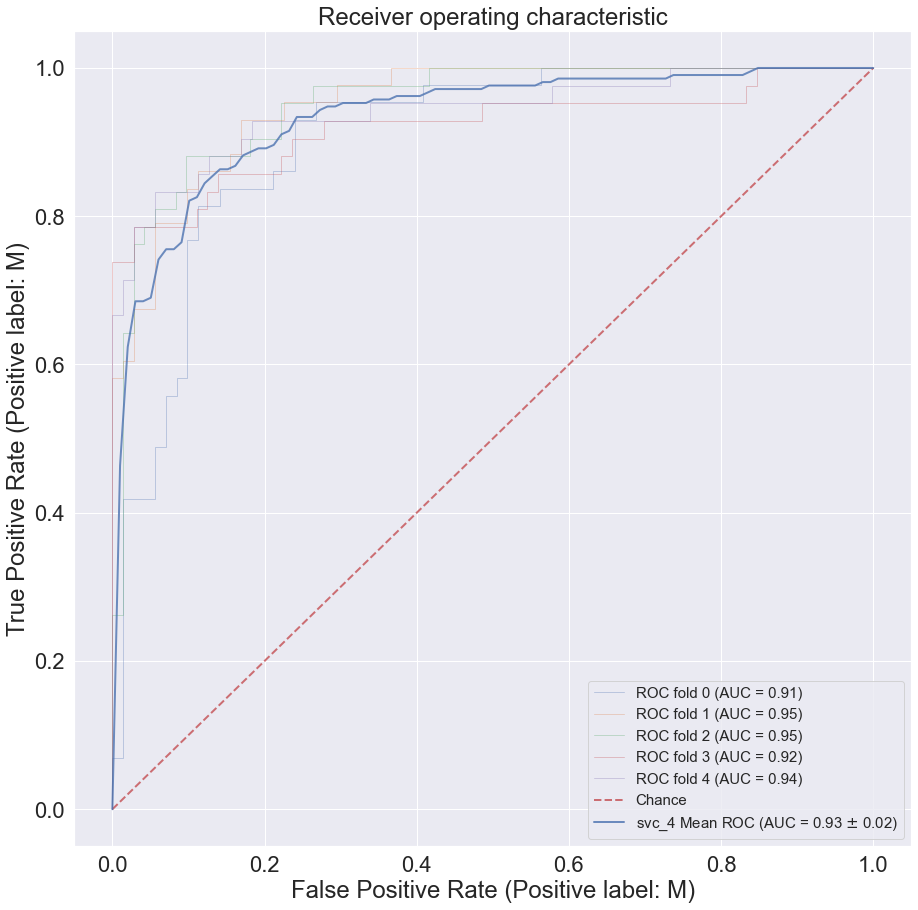

In [486]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

modelname= 'svc_4'
model=model_map[modelname]



fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=modelname+" Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

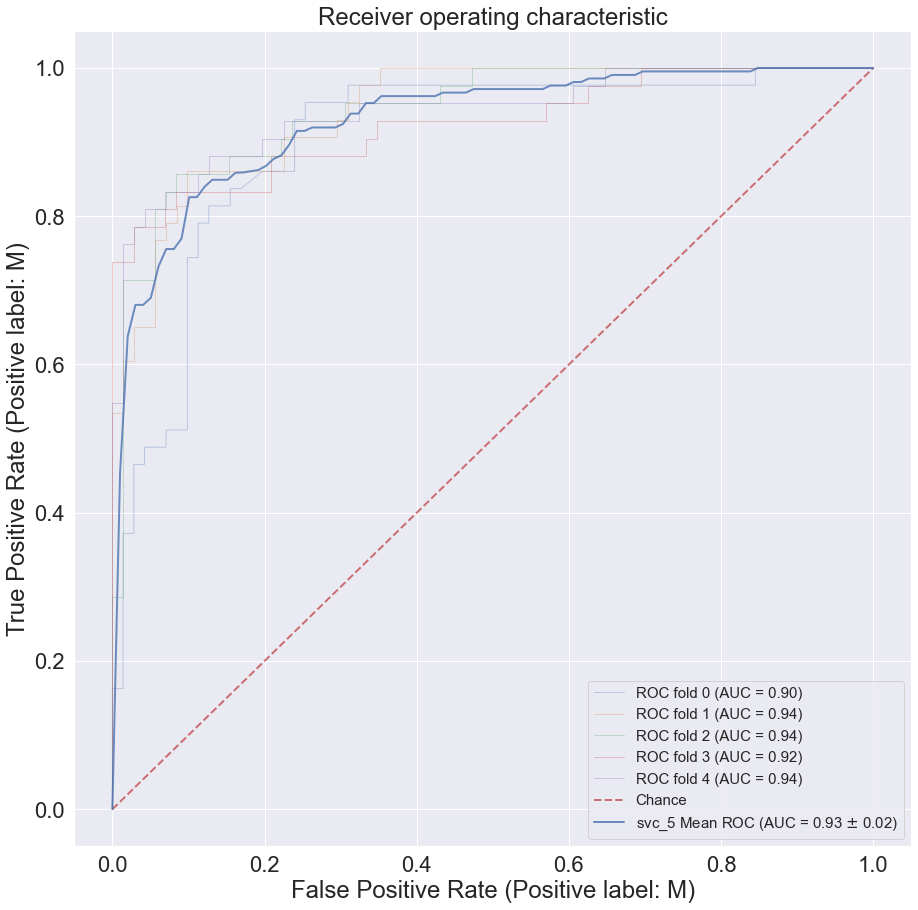

In [487]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold




X = dataSet5
y = target

n_samples, n_features = X.shape


random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


cv = StratifiedKFold(n_splits=5, shuffle = False)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

modelname= 'svc_5'
model=model_map[modelname]



fig, ax = plt.subplots(sharex=True, figsize=(15,15))

for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=modelname+" Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
display[modelname]={'tpr':mean_tpr, 'fpr': mean_fpr, 'auc': mean_auc , 'std':std_auc}

ax.legend(loc="lower right", prop={'size': 15})

plt.show()

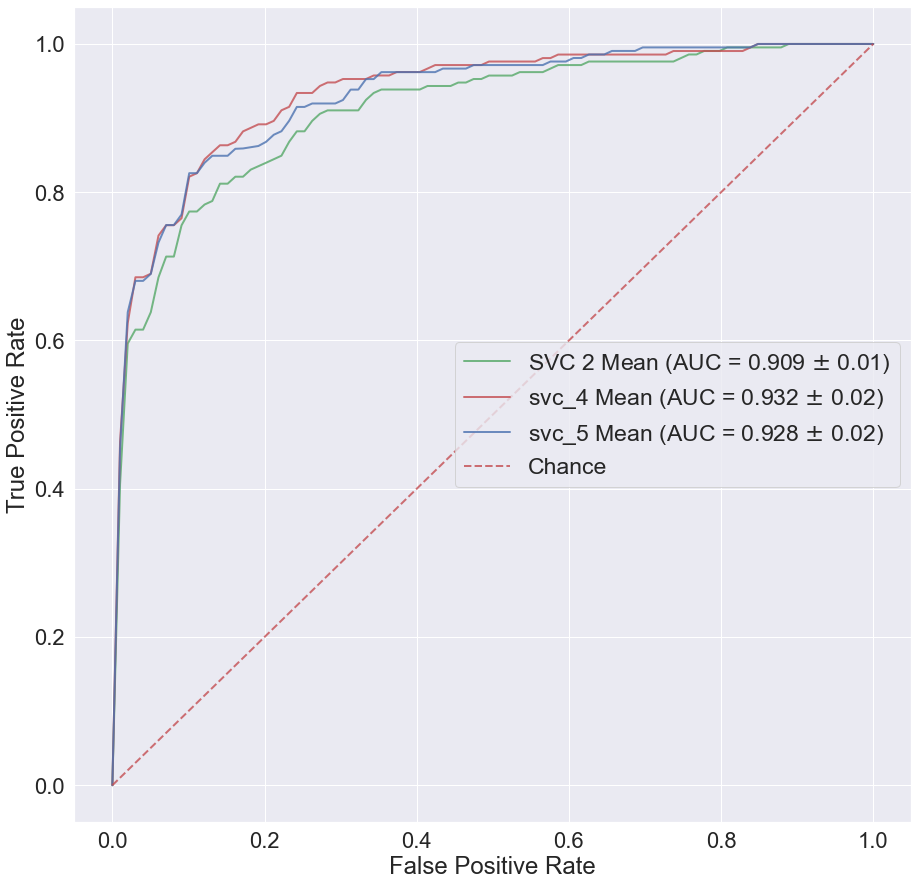

In [488]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

        
ax.plot(display ['SVC 2']['fpr'],
        display ['SVC 2']['tpr'], 
        color='g',
        label=r"SVC 2 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['SVC 2']['auc'], 
                                                                    display ['SVC 2']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['svc_4']['fpr'], 
        display ['svc_4']['tpr'],
        color='r',
        label=r"svc_4 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['svc_4']['auc'], 
                                                          display ['svc_4']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['svc_5']['fpr'], 
        display ['svc_5']['tpr'],
        color='b',
        label=r"svc_5 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['svc_5']['auc'], 
                                                        display ['svc_5']['std']),
        lw=2,
        alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)        
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.legend(loc="center right", prop={'size': 23})
plt.show()

O melhor modelo foi o SVC_4 que é o com hiperparâmetro kernel='rbf'

# Curva ROC

Para a curva ROC será utilizado a classe RocCurveDisplay do sklearn.

ROC Curve visualization.

It is recommend to use from_estimator or from_predictions to create a RocCurveDisplay. All parameters are stored as attributes.

As curvas ROC normalmente apresentam taxa de verdadeiros positivos no eixo Y e taxa de falsos positivos no eixo X. Isso significa que o canto superior esquerdo do gráfico é o ponto “ideal” - uma taxa de falsos positivos de zero e uma taxa de verdadeiros positivos de um (https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html #sphx-glr-auto-examples-model-selection-plot-roc-py). Quando maior a área cima da linha UAC, melhor o classificador. Os resultados para as regressões foram extremamente próximos, em diversas partes as linhas estão se sobrescrevendo. Também muito proximas da faixa ideal.

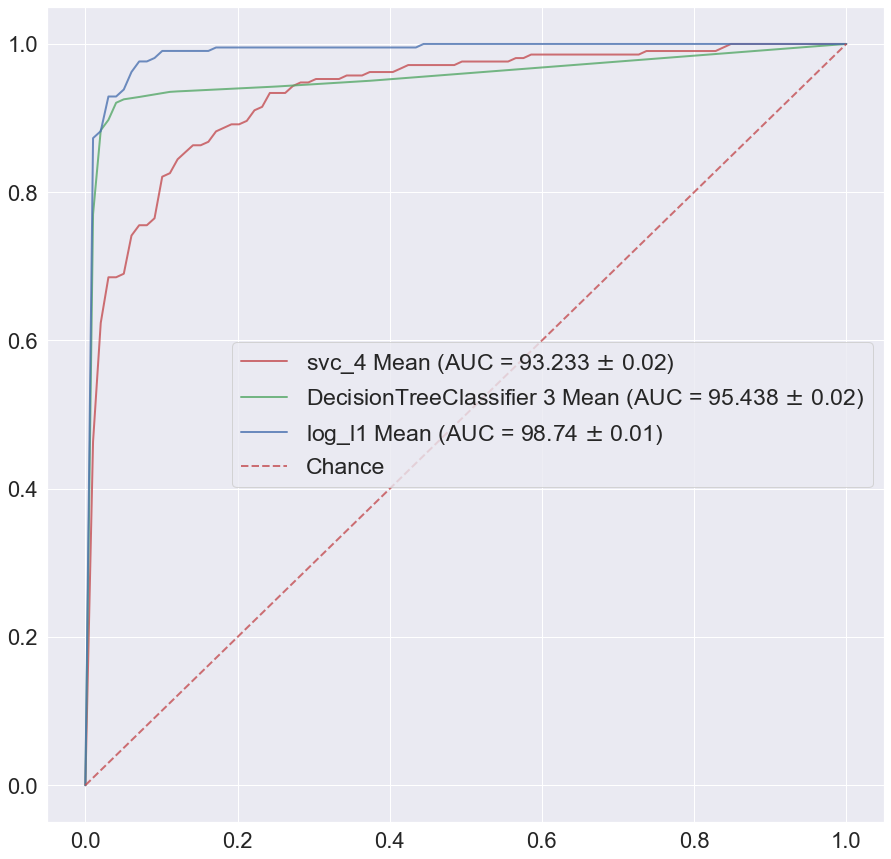

In [489]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fig, ax = plt.subplots(sharex=True, figsize=(15,15))

        
ax.plot(display ['svc_4']['fpr'], 
        display ['svc_4']['tpr'],
        color='r',
        label=r"svc_4 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['svc_4']['auc']*100, 
                                                          display ['svc_4']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['DecisionTreeClassifier 3']['fpr'],
        display ['DecisionTreeClassifier 3']['tpr'], 
        color='g',
        label=r"DecisionTreeClassifier 3 Mean (AUC = %0.3f $\pm$ %0.2f)" % (display ['DecisionTreeClassifier 3']['auc']*100, 
                                                                    display ['DecisionTreeClassifier 3']['std']),
        lw=2,
        alpha=0.8)
ax.plot(display ['log_l1']['fpr'],
        display ['log_l1']['tpr'], 
        color='b',
        label=r"log_l1 Mean (AUC = %0.2f $\pm$ %0.2f)" % (display ['log_l1']['auc']*100, 
                                                                    display ['log_l1']['std']),
        lw=2,
        alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)        

ax.legend(loc="center right", prop={'size': 23})
plt.show()

O modelo teve o melhor resultado foi o log_l1  lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0). Claro que, existem 
varias váriações possíveis dos hiperparâmetros que pode melhorar ou piorar os seus resultados. Mas este trabalho tentou realizar a 
comparação entre modelos do mesmo tipo com váriação de hiperparâmtros principais para comparação. 




A percepção nesse caso é que um Recall tem uma importância em relação a ter o menor FN - Falso negativo, que é o caso onde o tumor é M (real)
 e o algoritmo preve como B (predito). Entendo que, em um grande número de paciêntes, qualificar como tipo M significa, por exemplo, 
 a possíbilidade de uma contra prova, ou, o inicio de um tratamento especifico e de uma atenção especifica. Modelo log_l1 demostra um Recall melhor. 

In [490]:
from sklearn import preprocessing, model_selection, metrics
import random
from sklearn import svm

X=dataSet7

model_map = {
        'svc_2': svm.SVC(kernel='linear', C=0.1, probability=True),
        'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
        'tree3': tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
       

}

cv = StratifiedKFold(n_splits = 5, shuffle = False)
print("{}\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Prec","Recall", "F1-Score"))
print("------------------------------------------------------------------")
for modelname, model in model_map.items():
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))

Modelo	Acuracy	Prec	Recall	F1-Score
------------------------------------------------------------------
svc_2	 98.24	 98.64	 97.65	 98.10%
log_l1	 98.07	 98.18	 97.70	 97.92%
tree3	 92.97	 92.95	 92.03	 92.40%


Importante ressaltar que embora nos testes acima sempre são observados valores percentuais e um modelo fica melhor que outro, dependendo da forma como se trabalha os dados, isso pode mudar. Acho que isso foi percebido diversas vezes quando muda o número a quantidade de Folds, ou altera a forma de padronização e trabamento dos dados no inicio, um exemplo é esta simulação de comparação entre os modelos, onde o SVC_2 expressa ótimo resultados frente ao log_l1, devido a utilização do Power Transformer no dataset. Sendo assim esse processo de melhoria continua na modelagem, vai sempre gerar novos resultados criar uma mudança, em relação a um modelo ser melhor. Também acredito que o ideal seria utilizar mais de um modelo, até porque poderia haver uma contra prova do segundo modelo, por exemplo, para validar a escolha do primeiro, e gerar mais certeza. 